In [ ]:
# this is used to time the running of this notebook
import time
start_time = time.time()

Install python packages

In [ ]:
%%time

!pip install matplotlib
!pip install scikit-learn
!pip install numpy
!pip install scipy
!pip install leidenalg
!pip install scanpy

     |████████████████████████████████| 2.4MB 10.9MB/s 
     |████████████████████████████████| 3.2MB 49.8MB/s 
     |████████████████████████████████| 10.3MB 9.1MB/s 
     |████████████████████████████████| 122kB 30.2MB/s 
     |████████████████████████████████| 51kB 3.6MB/s 
     |████████████████████████████████| 71kB 5.2MB/s 
  Created wheel for sinfo: filename=sinfo-0.3.1-cp36-none-any.whl size=7014 sha256=6e8d35f19cb9e4095d24a570dc772e350f12d5a7c3deaa5aa1444952792ee4f1
  Stored in directory: /root/.cache/pip/wheels/11/f0/23/347d6d8e59787c2bc272162d18223dc3b45bd6dc40aceee6af
Successfully built sinfo
CPU times: user 114 ms, sys: 64.9 ms, total: 179 ms
Wall time: 25.1 s


In [3]:
%%time
!pip install kb-python

     |████████████████████████████████| 59.1MB 71kB/s 
     |████████████████████████████████| 13.2MB 320kB/s 
     |████████████████████████████████| 51kB 3.9MB/s 
     |████████████████████████████████| 112kB 60.6MB/s 
  Created wheel for loompy: filename=loompy-3.0.6-cp36-none-any.whl size=47895 sha256=b8df5f05fe363abf2e10b9a3be42bd5ba5dd1a83c1118f99fd49161ff5dc8b14
  Stored in directory: /root/.cache/pip/wheels/f9/a4/90/5a98ad83419732b0fba533b81a2a52ba3dbe230a936ca4cdc9
  Created wheel for numpy-groupies: filename=numpy_groupies-0.9.13-cp36-none-any.whl size=24069 sha256=852667d044baf7a7f793ba3eaa779a086db0eb4c927979da3e5453781226b75f
  Stored in directory: /root/.cache/pip/wheels/ef/97/d7/270bc85eb8b1b84629caac97a3900bff23edb7f834f6ed729e
Successfully built loompy numpy-groupies
  Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1
CPU times: user 186 ms, sys: 52.8 ms, total: 239 ms
Wall time: 36.2 s


Download the data

In [4]:
%%time
# Download the data from the ENA https://www.ebi.ac.uk/ena/browser/view/SRR8426358
!wget --continue ftp://ftp.sra.ebi.ac.uk/vol1/fastq/SRR842/008/SRR8426358/SRR8426358_1.fastq.gz
!wget --continue ftp://ftp.sra.ebi.ac.uk/vol1/fastq/SRR842/008/SRR8426358/SRR8426358_2.fastq.gz

--2021-02-09 08:09:56--  ftp://ftp.sra.ebi.ac.uk/vol1/fastq/SRR842/008/SRR8426358/SRR8426358_1.fastq.gz
           => ‘SRR8426358_1.fastq.gz’
Resolving ftp.sra.ebi.ac.uk (ftp.sra.ebi.ac.uk)... 193.62.197.74
Connecting to ftp.sra.ebi.ac.uk (ftp.sra.ebi.ac.uk)|193.62.197.74|:21... connected.
Logging in as anonymous ... Logged in!
==> SYST ... done.    ==> PWD ... done.
==> TYPE I ... done.  ==> CWD (1) /vol1/fastq/SRR842/008/SRR8426358 ... done.
==> SIZE SRR8426358_1.fastq.gz ... 5507959060
==> PASV ... done.    ==> RETR SRR8426358_1.fastq.gz ... done.
Length: 5507959060 (5.1G) (unauthoritative)

SRR8426358_1.fastq. 100%[===================>]   5.13G  55.3MB/s    in 3m 19s  

2021-02-09 08:13:15 (26.4 MB/s) - ‘SRR8426358_1.fastq.gz’ saved [5507959060]

--2021-02-09 08:13:15--  ftp://ftp.sra.ebi.ac.uk/vol1/fastq/SRR842/008/SRR8426358/SRR8426358_2.fastq.gz
           => ‘SRR8426358_2.fastq.gz’
Resolving ftp.sra.ebi.ac.uk (ftp.sra.ebi.ac.uk)... 193.62.197.74
Connecting to ftp.sra.ebi.ac.uk 

Download a kallisto index

In [5]:
!kb ref -d mouse -i index.idx -g t2g.txt -f1 transcriptome.fasta

[2021-02-09 08:23:19,651]    INFO Downloading files for mouse from https://caltech.box.com/shared/static/vcaz6cujop0xuapdmz0pplp3aoqc41si.gz to tmp/vcaz6cujop0xuapdmz0pplp3aoqc41si.gz
100% 1.89G/1.89G [02:38<00:00, 12.8MB/s]
[2021-02-09 08:25:59,239]    INFO Extracting files from tmp/vcaz6cujop0xuapdmz0pplp3aoqc41si.gz


Pseudoalignment and counting

the data we'll process was produced with Drop-Seq

In [6]:
# this command streams data to the notebook and produces a cells x genes count matrix

%%time
!kb count --h5ad -i index.idx -g t2g.txt -x Dropseq -o output --filter bustools -t 2 \
ftp://ftp.sra.ebi.ac.uk/vol1/fastq/SRR842/008/SRR8426358/SRR8426358_1.fastq.gz \
ftp://ftp.sra.ebi.ac.uk/vol1/fastq/SRR842/008/SRR8426358/SRR8426358_2.fastq.gz

[2021-02-09 08:26:41,411]    INFO Piping ftp://ftp.sra.ebi.ac.uk/vol1/fastq/SRR842/008/SRR8426358/SRR8426358_1.fastq.gz to output/tmp/SRR8426358_1.fastq.gz
[2021-02-09 08:26:41,414]    INFO Piping ftp://ftp.sra.ebi.ac.uk/vol1/fastq/SRR842/008/SRR8426358/SRR8426358_2.fastq.gz to output/tmp/SRR8426358_2.fastq.gz
[2021-02-09 08:26:41,414]    INFO Using index index.idx to generate BUS file to output from
[2021-02-09 08:26:41,414]    INFO         output/tmp/SRR8426358_1.fastq.gz
[2021-02-09 08:26:41,414]    INFO         output/tmp/SRR8426358_2.fastq.gz
[2021-02-09 08:53:07,550]    INFO Sorting BUS file output/output.bus to output/tmp/output.s.bus
[2021-02-09 08:53:34,692]    INFO Whitelist not provided
[2021-02-09 08:53:34,692]    INFO Generating whitelist output/whitelist.txt from BUS file output/tmp/output.s.bus
[2021-02-09 08:53:34,775]    INFO Inspecting BUS file output/tmp/output.s.bus
[2021-02-09 08:53:39,095]    INFO Correcting BUS records in output/tmp/output.s.bus to output/tmp/out

Basic QC

In [8]:
# setup

import anndata
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.patches as mpatches
import scanpy as sc
from scipy import stats

from collections import OrderedDict
from sklearn.decomposition import TruncatedSVD
from sklearn.manifold import TSNE
from sklearn.preprocessing import scale

from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import NeighborhoodComponentsAnalysis
from matplotlib import cm
from matplotlib.lines import Line2D

def nd(arr):
  return np.asarray(arr).reshape(-1)

def yex(ax):
  lims = [np.min([ax.get_xlim(), ax.get_ylim()]),
          np.max([ax.get_xlim(), ax.get_ylim()])]
  
  # now plot oth limits against each other
  ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
  ax.set_aspect('equal')
  ax.set_xlim(lims)
  ax.set_ylim(lims)
  return ax

def trim_axs(axs, N):
  """little helper to masasge the axs list to have correct length"""
  axs = axs.flat
  for ax in axs[N:]:
    ax.remove()
  return axs[:N]

import warnings
warnings.filterwarnings('ignore')

fsize=20

plt.rcParams.update({'font.size': fsize})
%config InlineBackend.figure_format = 'retina'

Next, we populate an object we call `adata` with the gene names, counts, and later other information about the dataset. First, we note that `adata` will contain *gene* counts. Throughout this notebook we focus on single-cell *gene* quantification, but it is possible to learn something about isoforms from all kinds of single-cell RNA-seq data. The ideal technology for studying isoforms is SMART-seq, but it is possible to also extract isoform information from Drop-seq and other droplet based single-cell RNA-seq technologies. For more on this see these two papers:

- Ntranos, Vasilis, Lynn Yi, Páll Melsted, and Lior Pachter. "[A discriminative learning approach to differential expression analysis for single-cell RNA-seq](https://www.nature.com/articles/s41592-018-0303-9)." Nature methods 16, no. 2 (2019): 163-166.

- Booeshaghi, A. Sina, Zizhen Yao, Cindy van Velthoven, Kimberly Smith, Bosiljka Tasic, Hongkui Zeng, and Lior Pachter. "[Isoform cell type specificity in the mouse primary motor cortex](https://www.biorxiv.org/content/10.1101/2020.03.05.977991v3.full)." bioRxiv (2020).

[Anndata objects](https://icb-anndata.readthedocs-hosted.com/en/stable/anndata.AnnData.html) are a key concept in Scanpy, and very powerful for organizing single-cell RNA-seq analysis.



In [12]:
# load the unfiltered matrix
adata = anndata.read_h5ad('output/counts_filtered/adata.h5ad')
adata.var['gene_id'] = adata.var.index.values

t2g = pd.read_csv('t2g.txt', header=None, names=['tid', 'gene_id', 'gene_name'], sep='\t')
t2g.index = t2g.gene_id

t2g = t2g.loc[~t2g.index.duplicated(keep='first')]
adata.var['gene_name'] = adata.var.gene_id.map(t2g['gene_name'])
adata.var.index = adata.var['gene_name']

In [13]:
adata

AnnData object with n_obs × n_vars = 1362 × 55421
    var: 'gene_name', 'gene_id'

Populate the anndata object

In [19]:
# Parameter settings we use throughout the notebook

num_TSNE = 2
state = 42
metric = 'euclidean'
n_neighbors = 30
num_PCA = 50
num_NCA = 10

# filtering criteria
cell_threshold = 100
gene_threshold = 3

mito_criteria = 30

n_top_genes = 5000

n_bins = 20

flavor = 'seurat'

The `flavor = seurat` setting is related to normalization of the data, and is an attempt by Scanpy to allow for analyses concordant with what one would obtain with the R package Seurat. Read more about this [here](https://icb-scanpy.readthedocs-hosted.com/en/1.4.4.post1/api/scanpy.api.pp.filter_genes_dispersion.html).

In [17]:
adata.obs["cell_counts"] = adata.X.sum(axis=1)
adata.var["gene_counts"] = nd(adata.X.sum(axis=0))

adata.obs["n_genes"] = nd((adata.X>0).sum(axis=1))
adata.var["n_cells"] = nd((adata.X>0).sum(axis=0))

mito_genes = adata.var_names.str.startswith('mt-')
adata.obs["percent_mito"] = adata[:,mito_genes].X.sum(axis=1)/adata.X.sum(axis=1)*100

Anndata features

### Examine the knee plot

The "knee plot" was introduced in the Drop-seq paper: 
- Macosko et al., [Highly parallel genome-wide expression profiling of individual cells using nanoliter droplets](https://www.cell.com/fulltext/S0092-8674(15)00549-8), 2015. DOI:10.1016/j.cell.2015.05.002

In this plot cells are ordered by the number of UMI counts associated to them (shown on the *x*-axis), and the fraction of droplets with at least that number of cells is shown on the *y*-axis:

IndexError: ignored

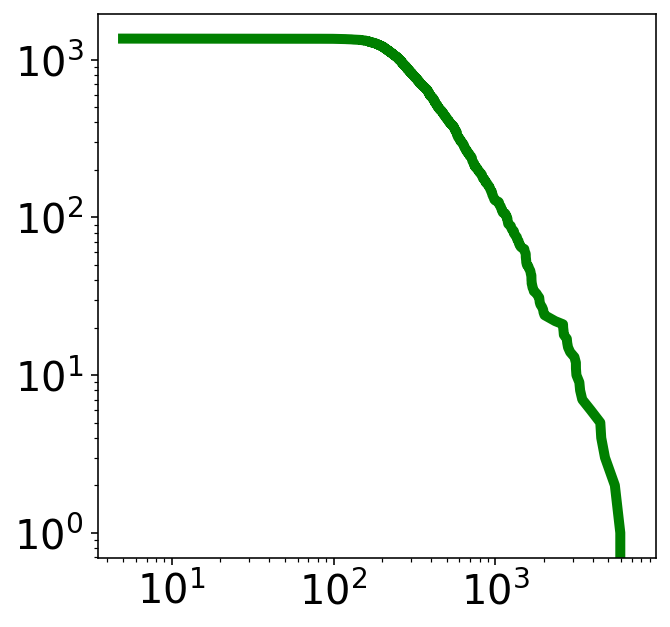

In [21]:
#@title Threshold cells according to knee plot { run: "auto", vertical-output: true }
expected_num_cells = 3000#@param {type:"integer"}
knee = np.sort(nd(adata.X.sum(axis=1)))[::-1]

fig, ax = plt.subplots(figsize=(5, 5))

x = knee
y = range(len(knee))

ax.loglog(x, y, linewidth=5, color="g")

ax.axvline(x=knee[expected_num_cells], linewidth=3, color="k")
ax.axhline(y=expected_num_cells, linewidth=3, color="k")

ax.set_xlabel("UMI Counts")
ax.set_ylabel("Set of Barcodes")

plt.show()

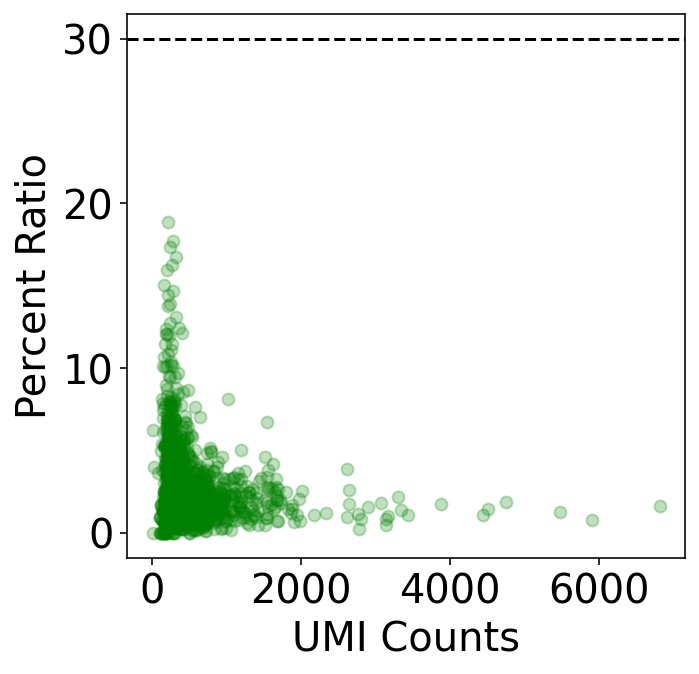

In [22]:
# examine mito content per cell

fig, ax = plt.subplots(figsize=(5, 5))

x = nd(adata.obs['cell_counts'])
y = nd(adata.obs['percent_mito'])

ax.scatter(x, y, color='green', alpha=0.25)

ax.axhline(y=mito_criteria, linestyle='--', color='k')

ax.set_xlabel('UMI Counts')
ax.set_ylabel('Percent Ratio')

plt.show()

In [26]:
# filter the anndata object
adata.obs["pass_count_filter"] = adata.obs["cell_counts"] > cell_threshold
adata.obs["pass_mito_filter"] = adata.obs.percent_mito < mito_criteria
adata.var["pass_gene_filter"] = adata.var["n_cells"] > gene_threshold

In [27]:
cell_mask = np.logical_and(adata.obs["pass_count_filter"].values, adata.obs["pass_mito_filter"].values)
gene_mask = adata.var["pass_gene_filter"].values

In [28]:
print('Current Shape: {:,} cells x {:,} genes'.format(adata.shape[0], adata.shape[1]))
print('    New shape: {:,} cells x {:,} genes'.format(cell_mask.sum(), gene_mask.sum()))

Current Shape: 1,362 cells x 55,421 genes
    New shape: 1,357 cells x 11,345 genes


In [29]:
data = adata[cell_mask, gene_mask]

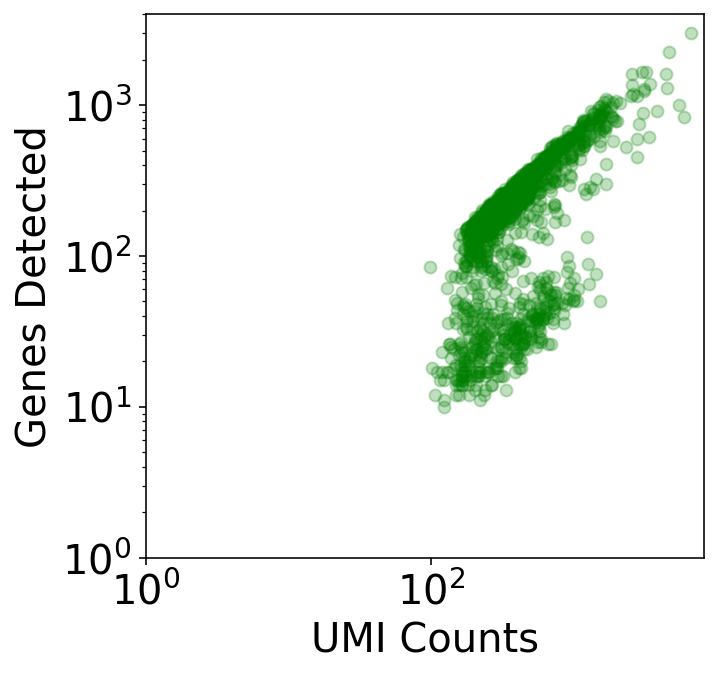

In [31]:
# library saturation

fig, ax = plt.subplots(figsize=(5, 5))

x = nd(data.X.sum(axis=1))
y = nd(np.sum(data.X>0, axis=1))

ax.scatter(x, y, color='green', alpha=0.25)

ax.set_xlabel('UMI Counts')
ax.set_ylabel('Genes Detected')
ax.set_xscale('log')
ax.set_yscale('log')

ax.set_xlim(1)
ax.set_ylim(1)

plt.show()

# this plot is misleading, as even the small alpha can't accurately show how many points are stacked at one location (this takes about a minute
# to run since there are a lot of points)

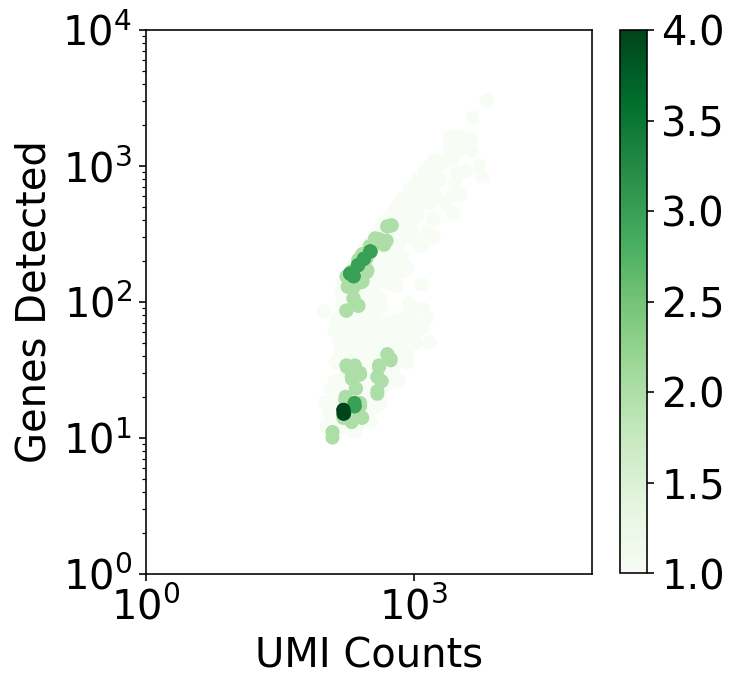

In [32]:
fig, ax = plt.subplots(figsize=(5, 5))

# histogram definition
bins = [1500, 1500] # number of bins

# histogram the data
hh, locx, locy = np.histogram2d(x, y, bins=bins)

# sort the points by density, so that the densest points are plotted last
z = np.array([hh[np.argmax(a <= locx[1:]), np.argmax(b <= locy[1:])] for a, b in zip(x, y)])
idx = z.argsort()
x2, y2, z2 = x[idx], y[idx], z[idx]

s = ax.scatter(x2, y2, c=z2, cmap='Greens')
fig.colorbar(s, ax=ax)

ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('UMI Counts')
ax.set_ylabel('Genes Detected')

ax.set_xlim(1, 10**5)
ax.set_ylim(1, 10**4)

plt.show()

In [ ]:
data

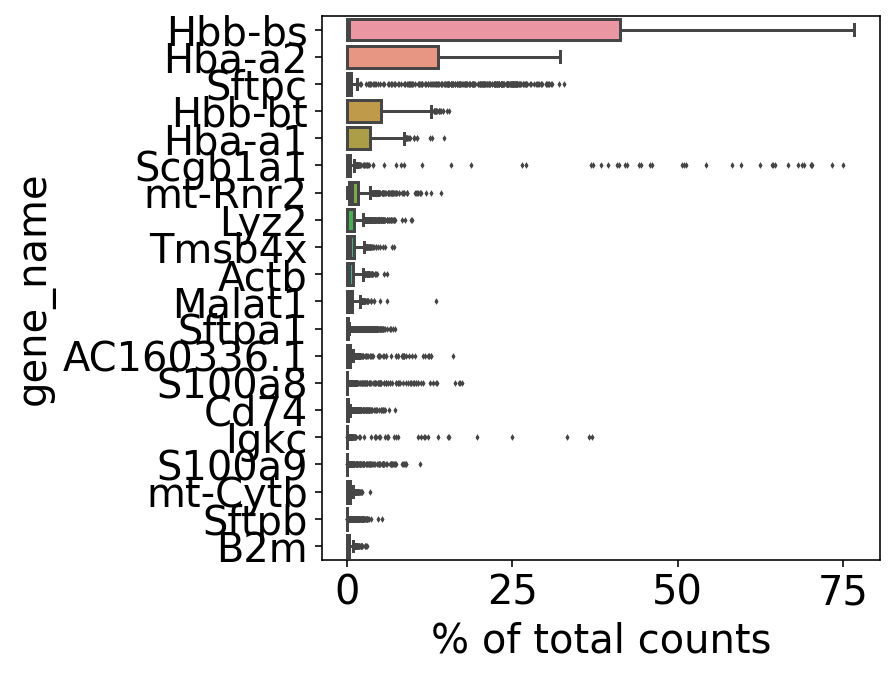

In [33]:
fig, ax = plt.subplots(figsize=(5, 5))
sc.pl.highest_expr_genes(data,n_top=20, ax=ax)

In [35]:
# setup
def vplot(y, ax):
  parts = ax.violinplot(
      y, showmeans=False, showmedians=False,
      showextrema=False)
  
  mean = y.mean()
  ax.scatter(1, mean, zorder=10, color='white')

  x = np.random.normal(1, 0.04, size=len(y))
  ax.scatter(x, y, color='k', s=1)

  for pc in parts['bodies']:
    pc.set_facecolor('#D43F3A')
    pc.set_edgecolor('black')
    pc.set_alpha(1)
  
  ax.set_xticks([1])
  ax.set_xticklabels([""])

  return ax



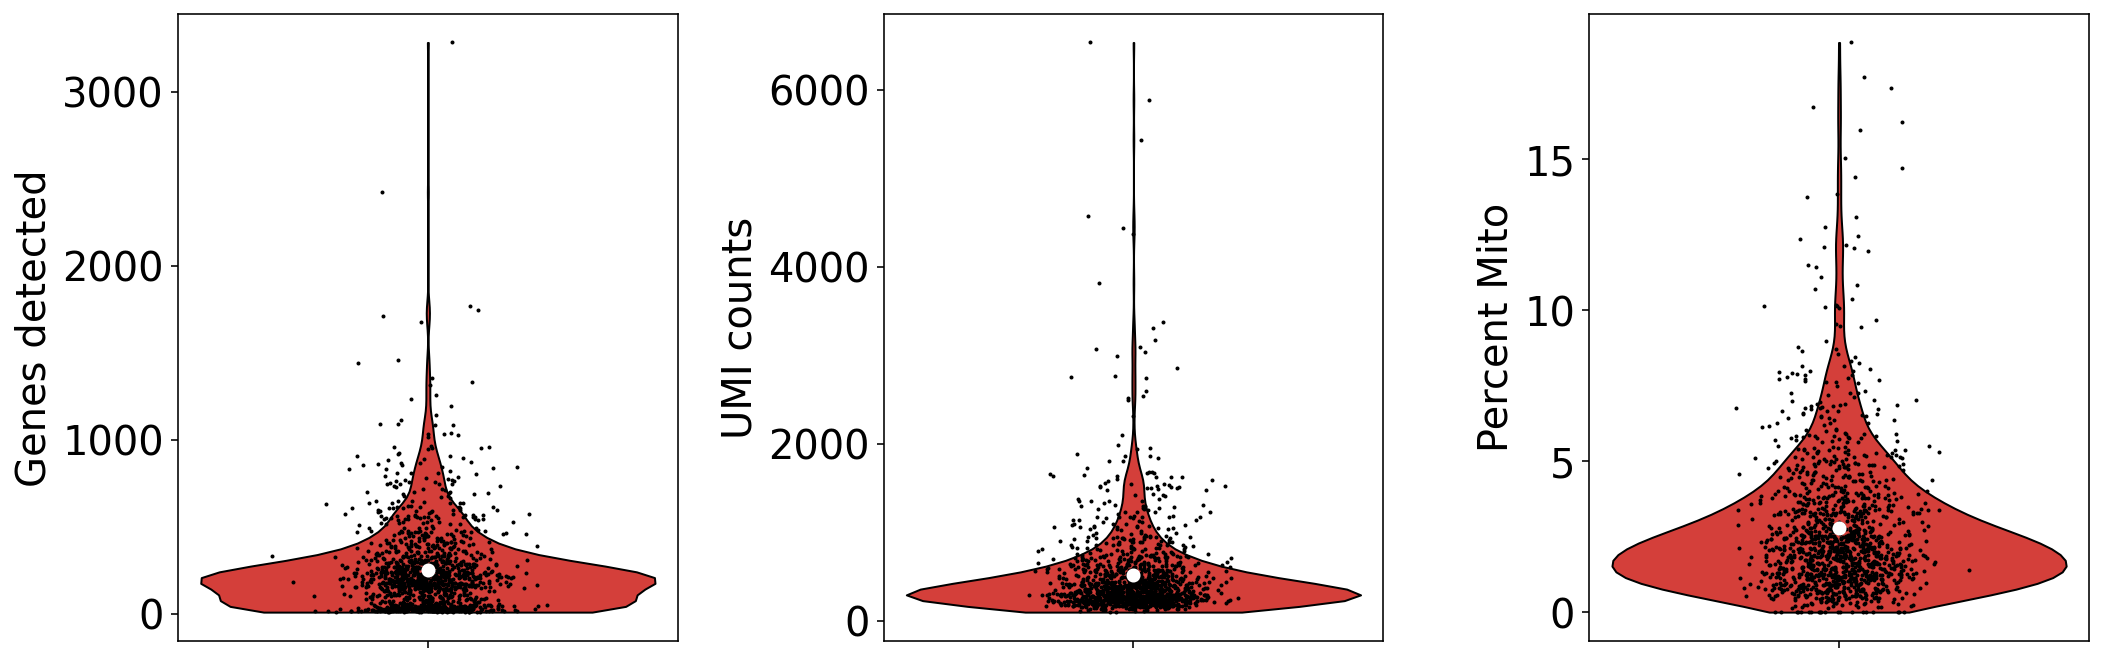

In [37]:
# plot distributions
fig, ax = plt.subplots(figsize=(5*3,5), ncols=3)

x1 = data.obs["n_genes"]
x2 = nd(data.X.sum(axis=1))
x3 = data.obs["percent_mito"]

vplot(x1, ax[0])
vplot(x2, ax[1])
vplot(x3, ax[2])

ax[0].set_ylabel("Genes detected")
ax[1].set_ylabel("UMI counts")
ax[2].set_ylabel("Percent Mito")

plt.tight_layout()
plt.show()

In [38]:
# process the matrix for clustering, visualization and DE
data.layers['raw'] = data.X

In [39]:
scale_num = 1000000
data.layers['norm'] = normalize(data.X, norm='l1', axis=1)*scale_num

In [40]:
data.layers['log1p'] = np.log1p(data.layers['norm'])
data.uns = OrderedDict([('log1p', {'base':None})])

In [41]:
data.X = data.layers['log1p']

In [43]:
# detecting highly variable genes is done on the log1p(norm) data
sc.pp.highly_variable_genes(data, n_top_genes=n_top_genes, flavor=flavor, n_bins=n_bins)
hvg_mask = data.var.highly_variable.values

In [44]:
# scale the colums of the matrix to unit variance and zero mean
%%time
# Scaling operation cannot be performed on the sparse matrix, so we make a dense matrix
mat = data.layers["log1p"].todense()
data.layers["scale"] = scale(mat, axis=0, with_mean=True, with_std=True, copy=True)
data.X = data.layers["scale"]

del mat

CPU times: user 329 ms, sys: 354 ms, total: 683 ms
Wall time: 698 ms


In [47]:
# generating visualization
%%time
# PCA
X = data.X[:, hvg_mask]

tsvd = TruncatedSVD(n_components=num_PCA)
data.obsm['X_pca'] = tsvd.fit_transform(X)

CPU times: user 1.26 s, sys: 975 ms, total: 2.24 s
Wall time: 1.22 s


In [48]:
# clustering
sc.pp.neighbors(data, n_neighbors=n_neighbors, n_pcs=num_PCA, random_state=state)
sc.tl.leiden(data, random_state=state)

In [49]:
# t-SNE
X = data.obsm['X_pca']
tsne = TSNE(n_components=num_TSNE, metric=metric, random_state=state)
data.obsm['X_pca_tsne'] = tsne.fit_transform(X)

In [50]:
# NCA
X = data.X
y = data.obs.leiden.values # you could use louvain here also

nca = NeighborhoodComponentsAnalysis(n_components=num_NCA,random_state=state)
data.obsm["X_nca"] = nca.fit_transform(X, y)

In [52]:
# t-SNE the NCA projection
X = data.obsm['X_nca']
tsne = TSNE(n_components=num_TSNE, metric=metric, random_state=state)
data.obsm['X_nca_tsne'] = tsne.fit_transform(X)

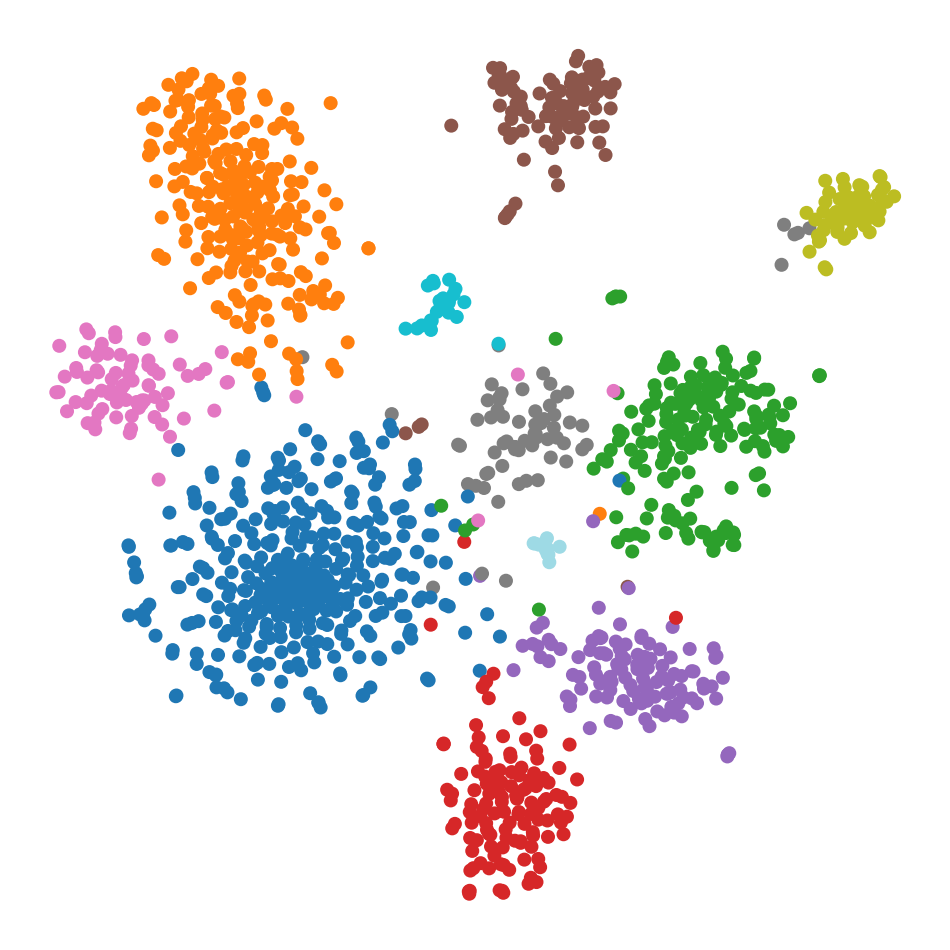

In [53]:
# visualization
fig, ax = plt.subplots(figsize=(7, 7))
x = data.obsm['X_pca_tsne'][:, 0]
y = data.obsm['X_pca_tsne'][:, 1]
c = data.obs['leiden'].astype(int)

ax.scatter(x, y, c = c, cmap='tab20')
ax.set_axis_off()

plt.tight_layout()
plt.show()

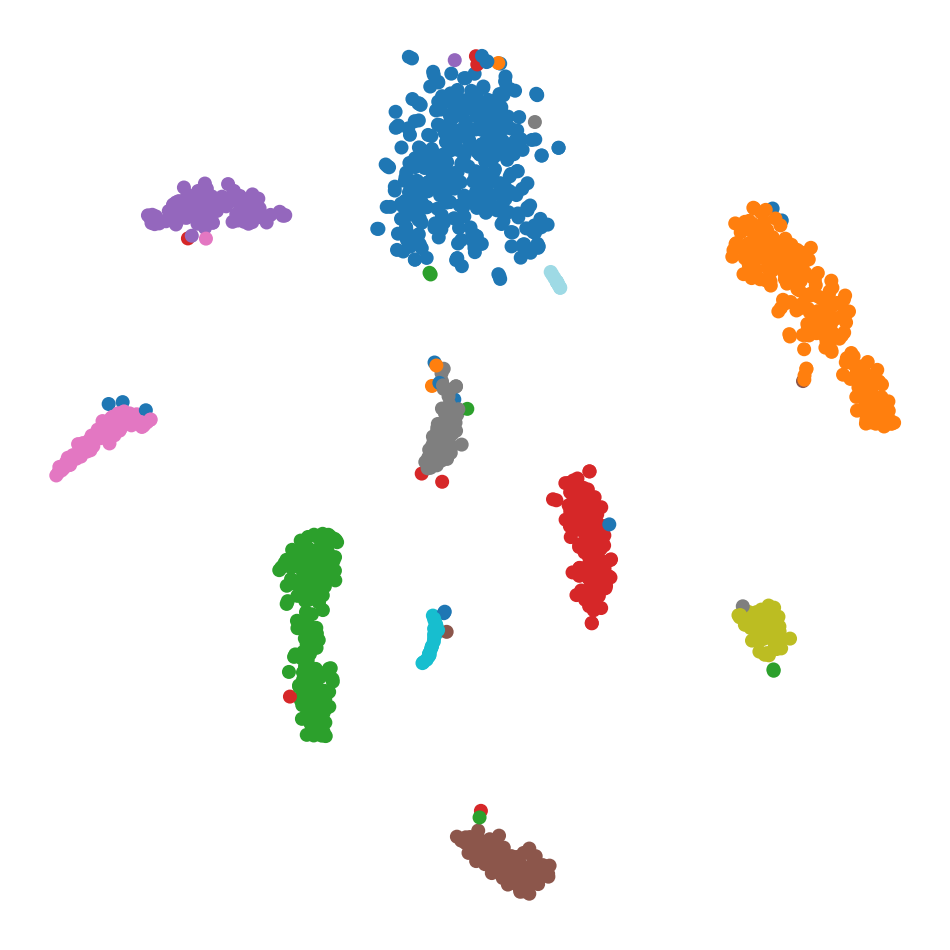

In [55]:
fig, ax = plt.subplots(figsize=(7,7))

x = data.obsm["X_nca_tsne"][:,0]
y = data.obsm["X_nca_tsne"][:,1]
c = data.obs["leiden"].astype(int)

ax.scatter(x, y, c = c, cmap='tab20')

ax.set_axis_off()

plt.tight_layout()
plt.show()

## Find marker genes
A key aspect of annotating a cell atlas is identifying "marker genes". These are genes specific to individual clusters that "mark" them, and are important both for assigning functions to cell clusters, and for designing downstream experiments to probe activity of clusters. 

A gene marker analysis begins with ranking genes in each cluster according to how different they are relative to other clusters. Typically the t-test is used for this purpose.

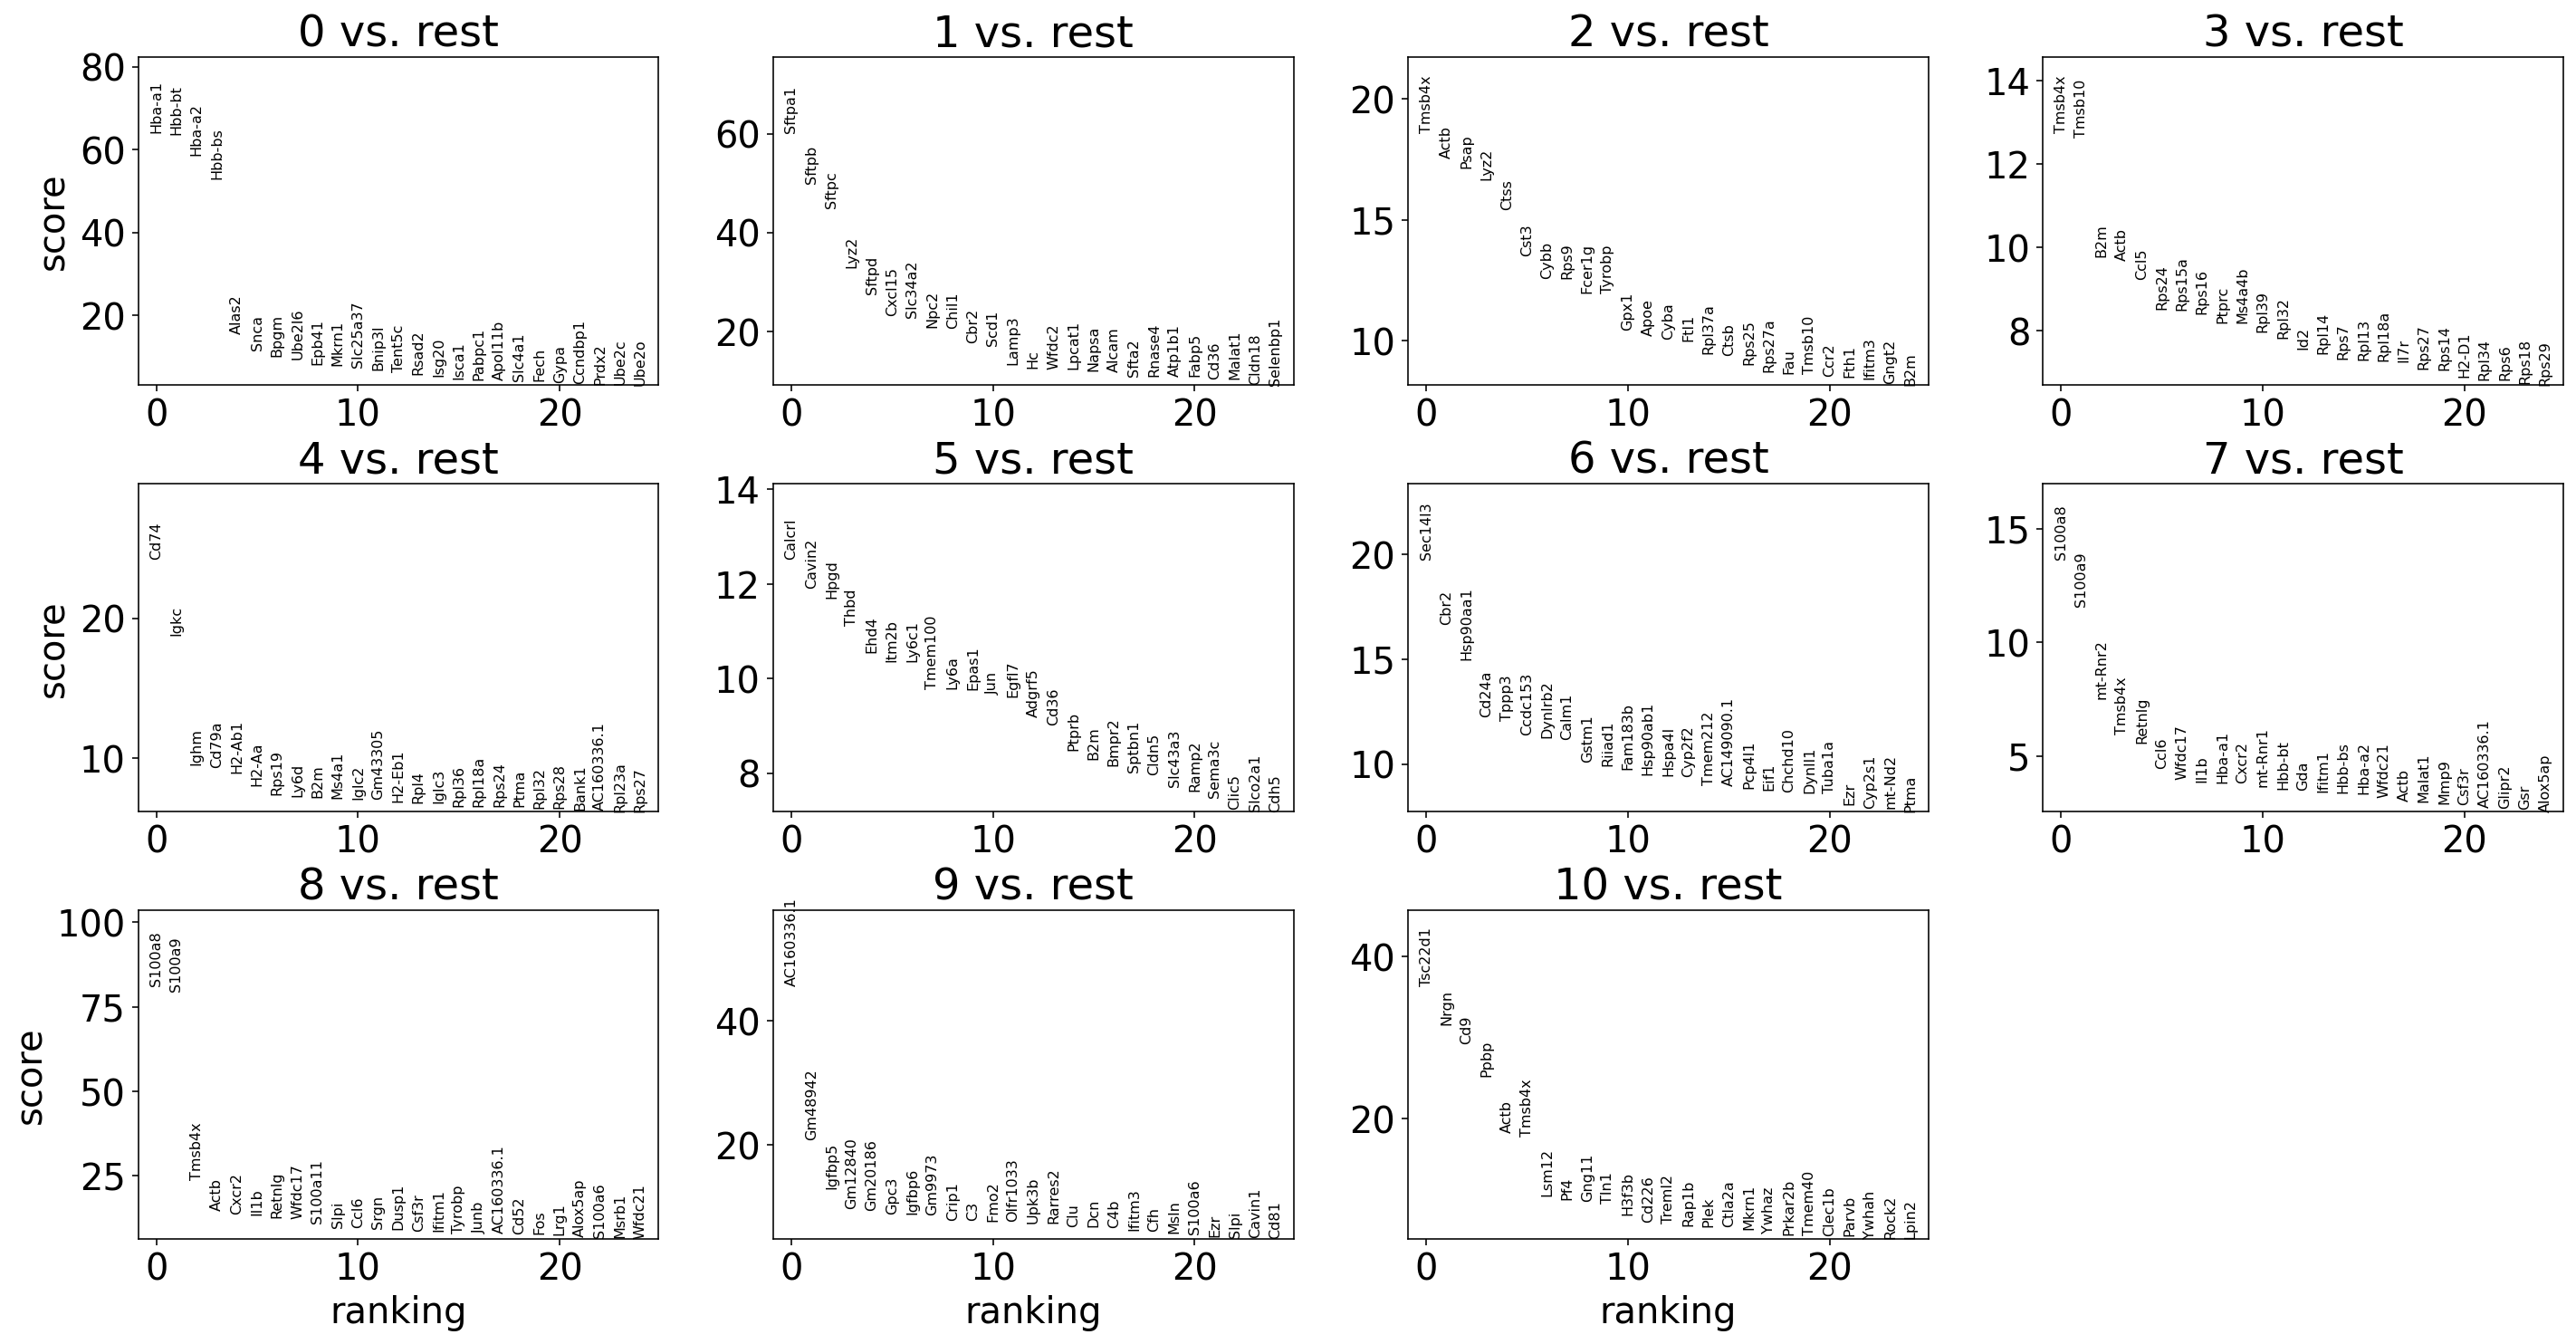

In [56]:
sc.tl.rank_genes_groups(data, 'leiden', method = 't-test', corr_method='bonferroni')
sc.pl.rank_genes_groups(data, n_genes=25, sharey=False)

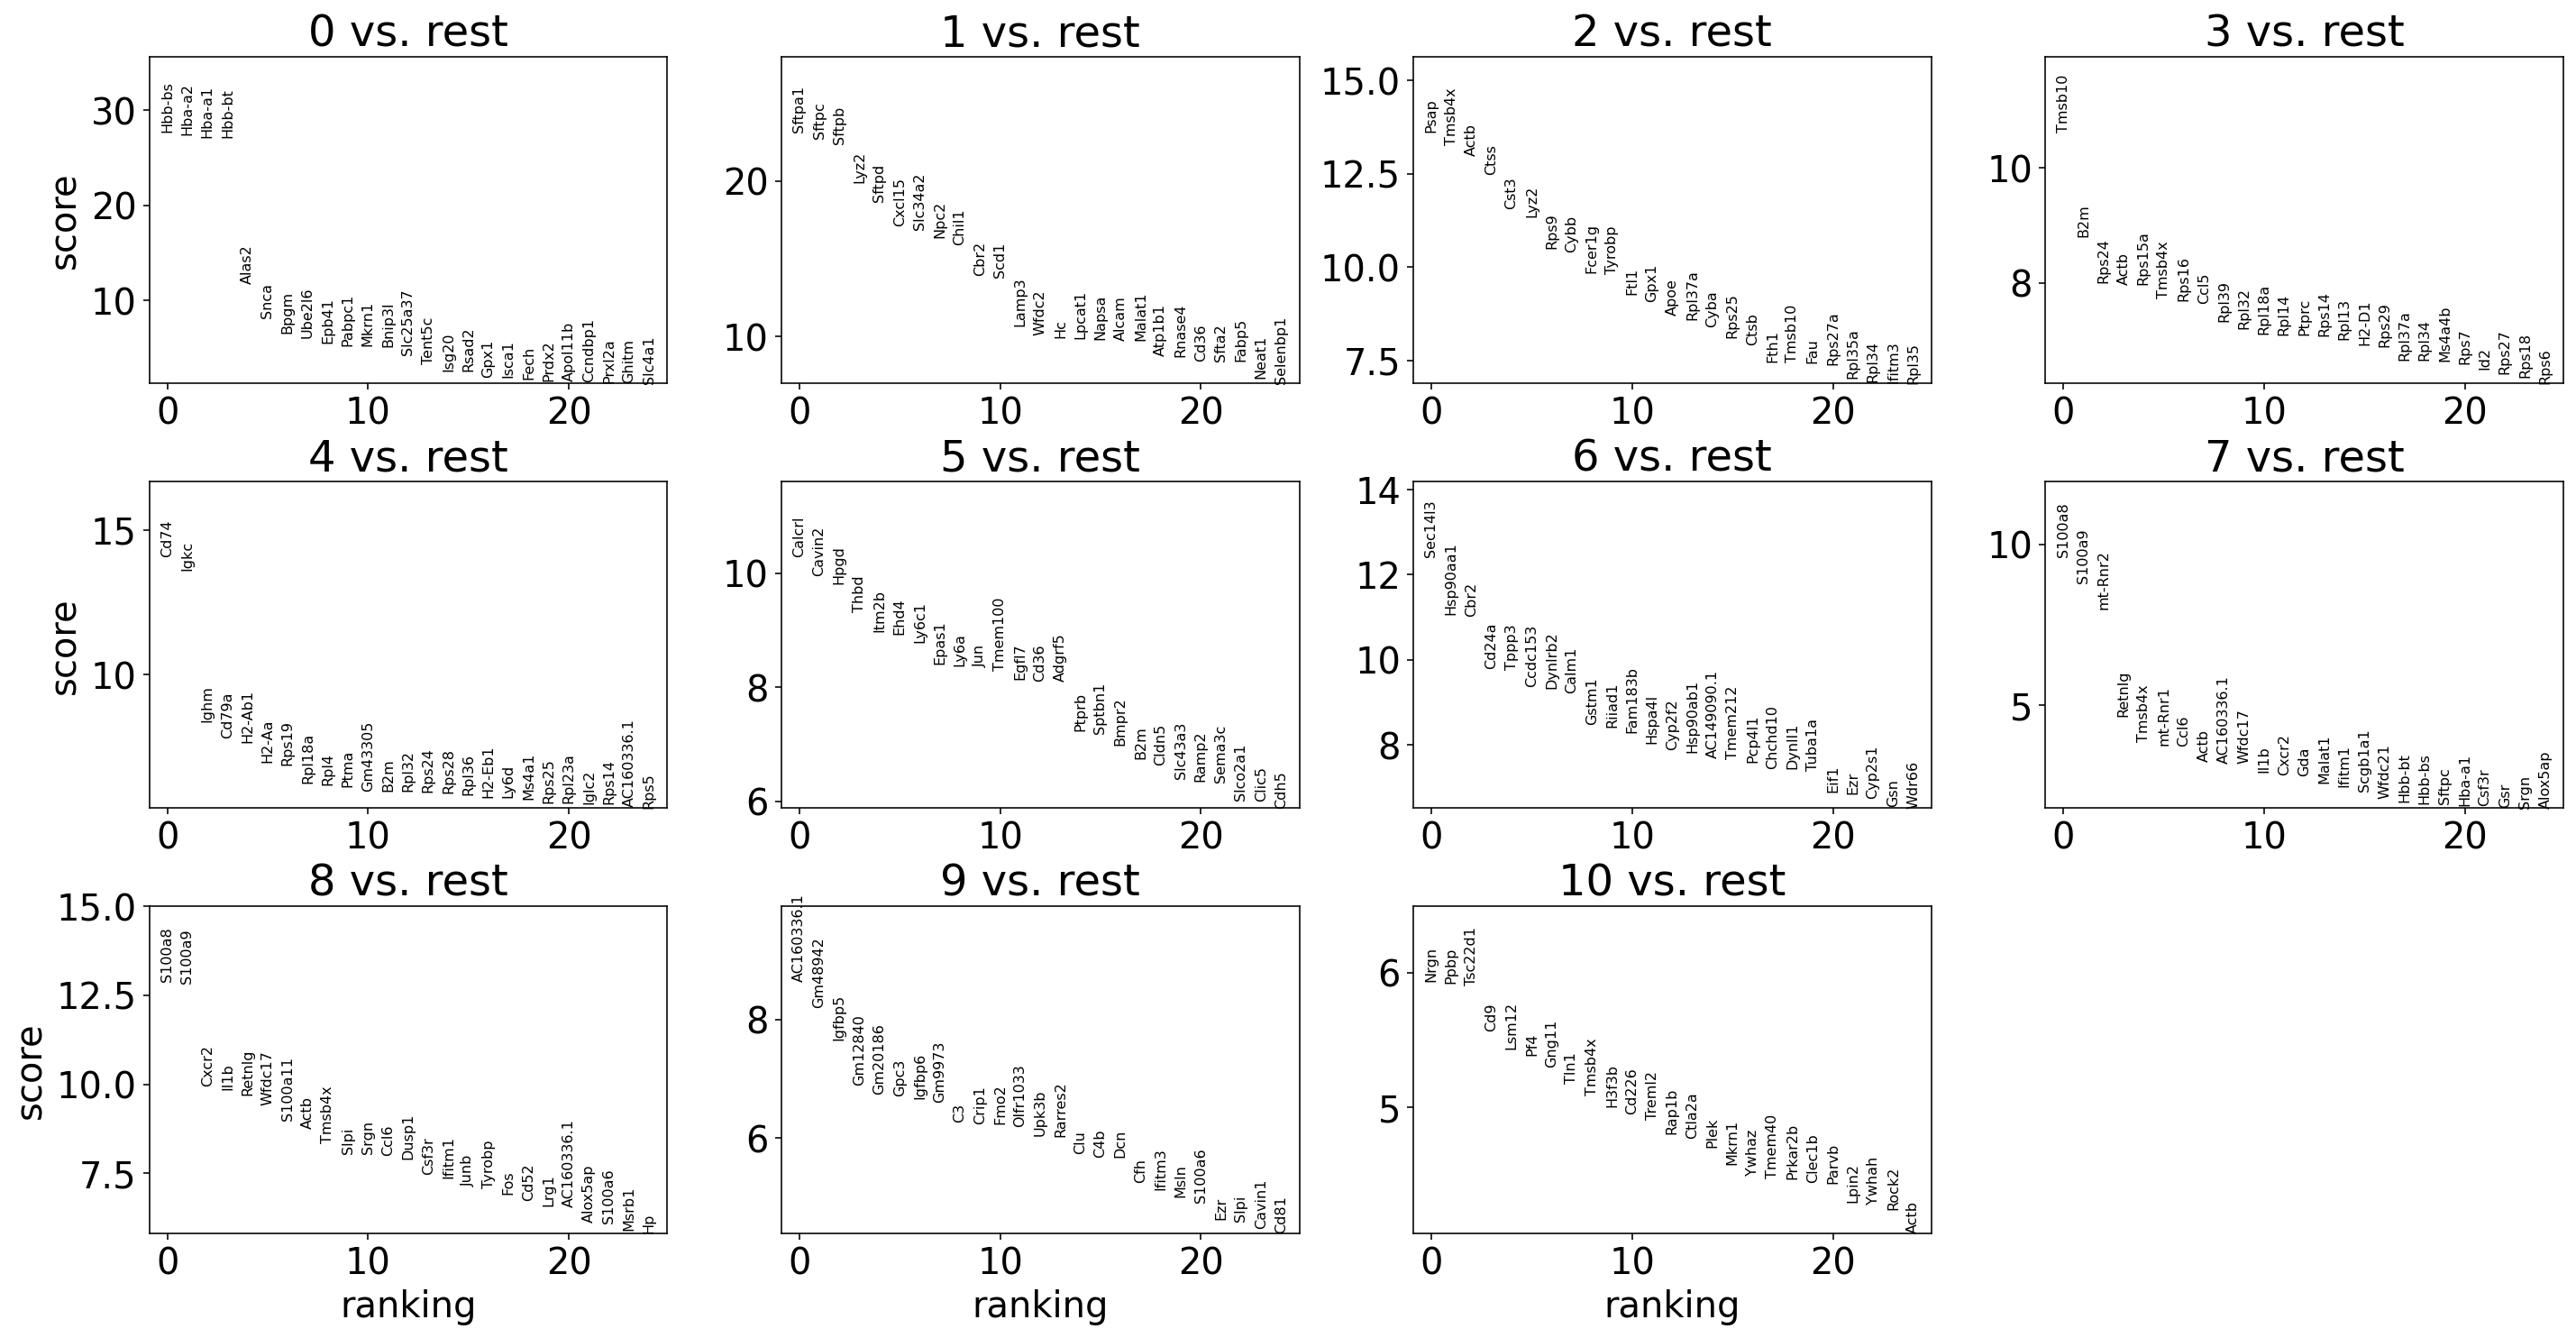

In [57]:
sc.tl.rank_genes_groups(data, 'leiden', method='wilcoxon', corr_method="bonferroni")
sc.pl.rank_genes_groups(data, n_genes=25, sharey=False)

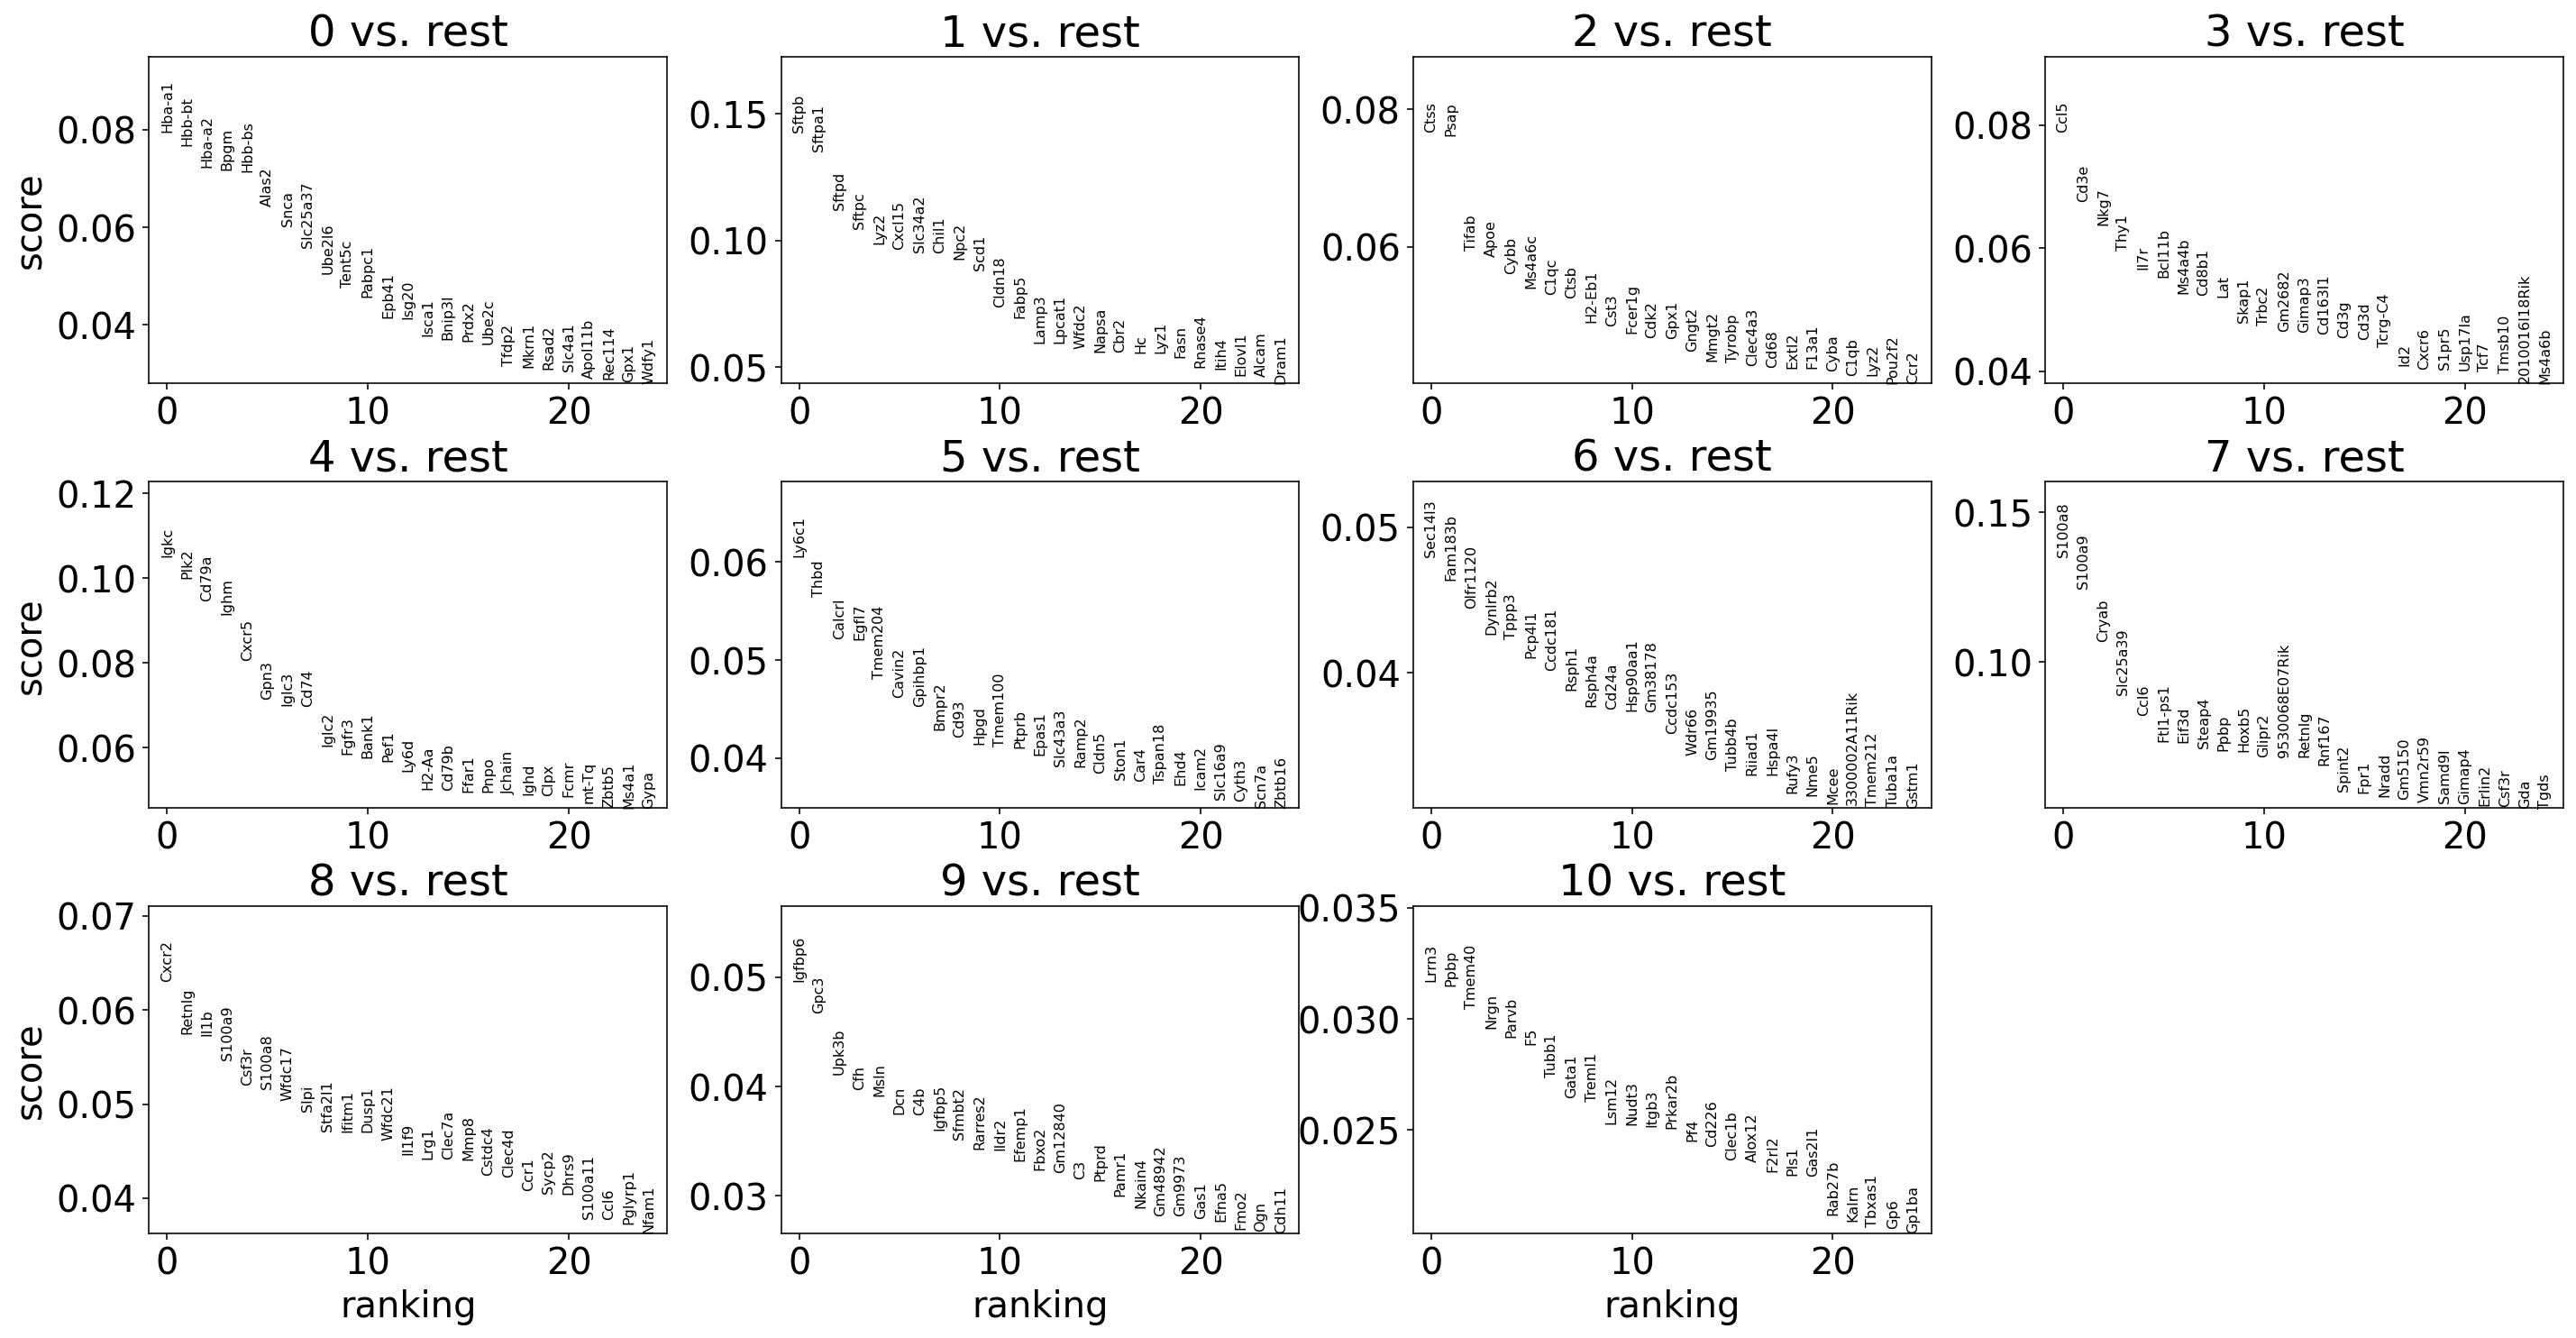

In [58]:
sc.tl.rank_genes_groups(data, 'leiden', method='logreg')
sc.pl.rank_genes_groups(data, n_genes=25, sharey=False)

In [59]:
sc.tl.rank_genes_groups(data, 'leiden', method='wilcoxon', corr_method="bonferroni")

In [60]:
pd.DataFrame(data.uns['rank_genes_groups']['names']).head(10)

,0,1,2,3,4,5,6,7,8,9,10
0,Hbb-bs,Sftpa1,Psap,Tmsb10,Cd74,Calcrl,Sec14l3,S100a8,S100a8,AC160336.1,Nrgn
1,Hba-a2,Sftpc,Tmsb4x,B2m,Igkc,Cavin2,Hsp90aa1,S100a9,S100a9,Gm48942,Ppbp
2,Hba-a1,Sftpb,Actb,Rps24,Ighm,Hpgd,Cbr2,mt-Rnr2,Cxcr2,Igfbp5,Tsc22d1
3,Hbb-bt,Lyz2,Ctss,Actb,Cd79a,Thbd,Cd24a,Retnlg,Il1b,Gm12840,Cd9
4,Alas2,Sftpd,Cst3,Rps15a,H2-Ab1,Itm2b,Tppp3,Tmsb4x,Retnlg,Gm20186,Lsm12
5,Snca,Cxcl15,Lyz2,Tmsb4x,H2-Aa,Ehd4,Ccdc153,mt-Rnr1,Wfdc17,Gpc3,Pf4
6,Bpgm,Slc34a2,Rps9,Rps16,Rps19,Ly6c1,Dynlrb2,Ccl6,S100a11,Igfbp6,Gng11
7,Ube2l6,Npc2,Cybb,Ccl5,Rpl18a,Epas1,Calm1,Actb,Actb,Gm9973,Tln1
8,Epb41,Chil1,Fcer1g,Rpl39,Rpl4,Ly6a,Gstm1,AC160336.1,Tmsb4x,C3,Tmsb4x
9,Pabpc1,Cbr2,Tyrobp,Rpl32,Ptma,Jun,Riiad1,Wfdc17,Slpi,Crip1,H3f3b


In [61]:
genes = pd.DataFrame(data.uns['rank_genes_groups']['names']).to_numpy()
pvals = pd.DataFrame(data.uns['rank_genes_groups']['pvals']).to_numpy()

In [66]:
unique = np.unique(data.obs.leiden.values.astype(int)).astype(str)
markers_gene = pd.DataFrame(index=unique, columns=["gene_name", "p_value"])

In [67]:
for un, u in enumerate(unique):
    g = genes[:,un]
    p = pvals[:,un]
    markers_gene.loc[u]["gene_name"]  = g.tolist()
    markers_gene.loc[u]["p_value"] = p.tolist()

In [68]:
markers_gene = markers_gene.apply(pd.Series.explode).reset_index()
markers_gene = markers_gene.rename(columns={"index":'leiden'})

In [69]:
markers_gene.drop_duplicates(['leiden'])

,leiden,gene_name,p_value
0,0,Hbb-bs,5.07471e-169
11345,1,Sftpa1,2.41854e-118
22690,2,Psap,3.21909e-42
34035,3,Tmsb10,2.25173e-26
45380,4,Cd74,6.03161e-45
56725,5,Calcrl,8.40957e-25
68070,6,Sec14l3,2.09426e-35
79415,7,S100a8,7.20515e-22
90760,8,S100a8,5.7039e-38
102105,9,AC160336.1,5.99701e-18


In [70]:
def vplot_de(x, unique, specific_gene, specific_cluster, ax):
    unique = unique.astype(str)
    labels = unique
    lidx = np.arange(1, len(labels)+1)  # the label locations
    midx = np.where(unique==specific_cluster)[0][0]
    
    
    parts = ax.violinplot(x, showmedians=False, showextrema=False)
    for pcidx, pc in enumerate(parts['bodies']):
        pc.set_facecolor('grey')
        pc.set_edgecolor('black')
        pc.set_alpha(1)
        if pcidx == midx:
            pc.set_facecolor('#D43F3A')
            
    mean = [np.mean(i) for i in x]
    ax.scatter(lidx, mean, marker='o', color='white', s=30, zorder=3)
    
    ax.set_ylabel("$log(CPM + 1)$".format(specific_gene))
    ax.set_xticks(lidx)
    ax.set_xticklabels(labels, rotation=0, ha="center")
    ax.set_title("{} gene in cluster {}".format(specific_gene, specific_cluster))
    
    return ax

In [71]:
specific_cluster = markers_gene.drop_duplicates(['leiden'])['leiden'].values
specific_gene = markers_gene.drop_duplicates(['leiden'])['gene_name'].values

In [72]:
unique

array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10'],
      dtype='<U21')

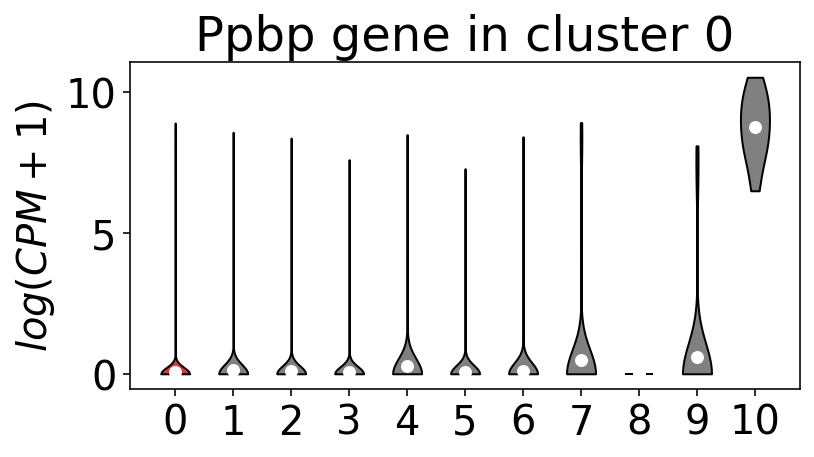

In [74]:
# plot one cluster, gene pair
fig, ax = plt.subplots(figsize=(6, 3))

spec_c = markers_gene[markers_gene.gene_name=="Ppbp"]["leiden"].values[0]
spec_g = "Ppbp"

x = []
for c in unique:
    x.append(nd(data[data.obs.leiden==str(c)][:,data.var.gene_name==spec_g].layers["log1p"].todense()).tolist())
    
vplot_de(x, unique, spec_g, spec_c, ax=ax)

ax.set_ylabel("$log(CPM+1)$")

plt.show()

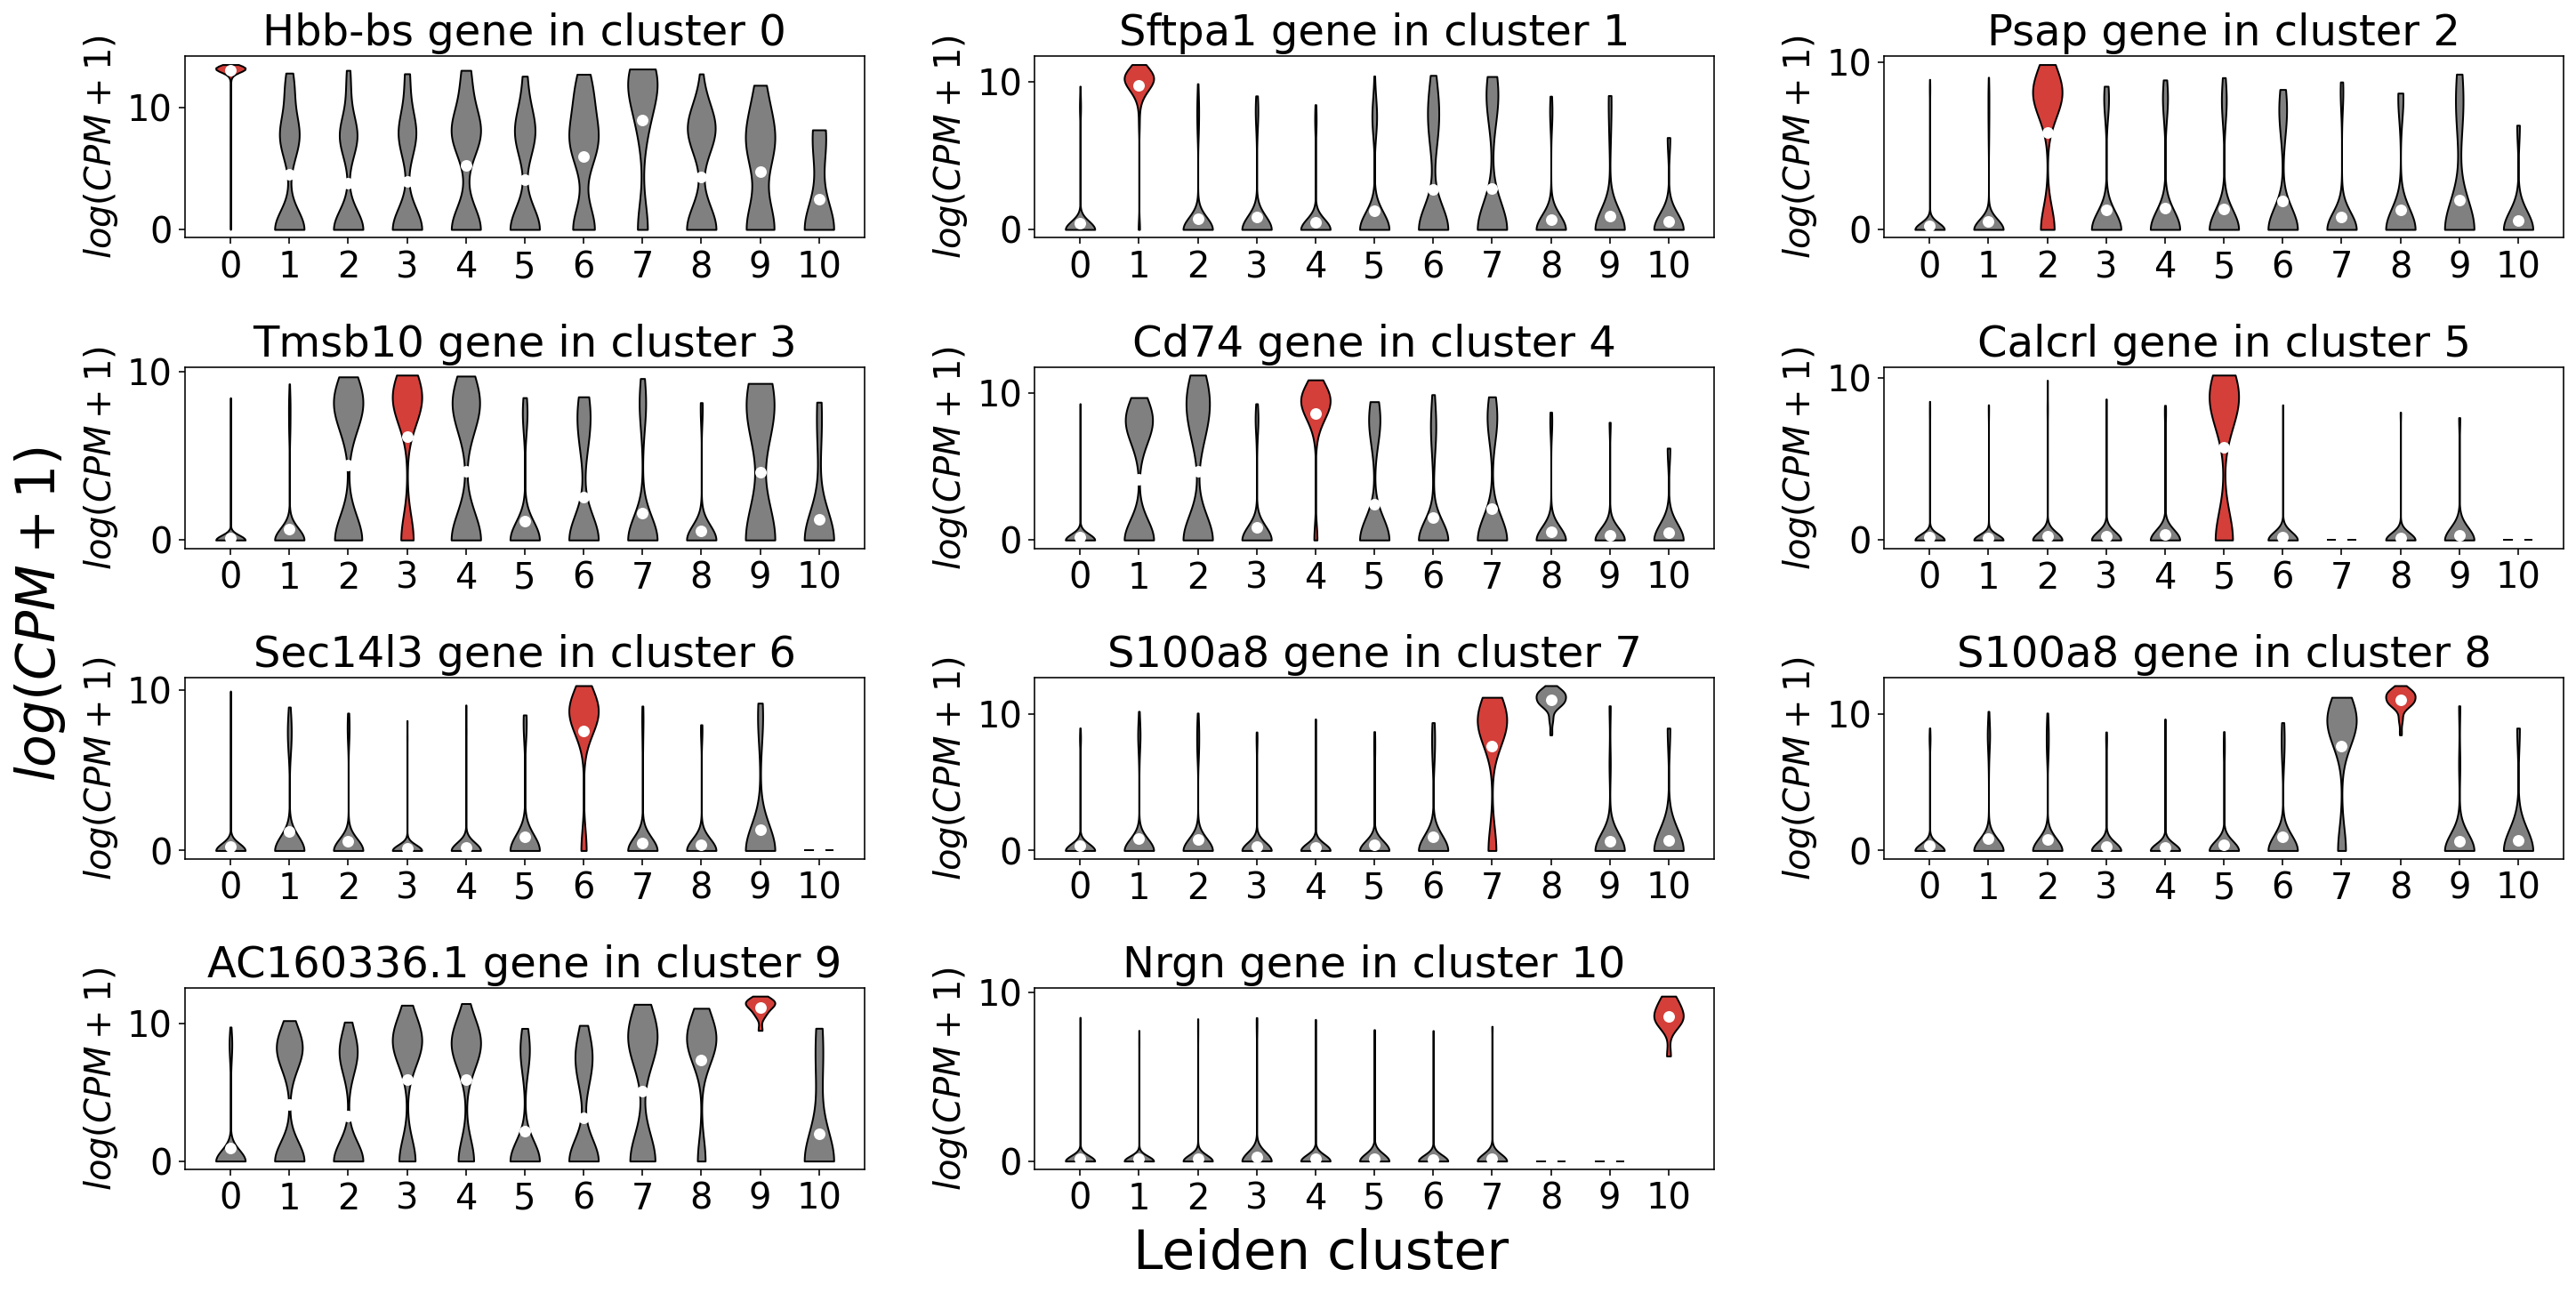

In [75]:
# plot all clusters gene pairs
length = len(specific_cluster)*5
height = 3

fig, ax = plt.subplots(figsize=(20,10), ncols = 3, nrows=4)

axs = trim_axs(ax, len(specific_cluster))

for sn, (spec_c, spec_g) in enumerate(zip(specific_cluster, specific_gene)):
    x = []
    for c in unique:
        x.append(nd(data[data.obs.leiden==str(c)][:,data.var.gene_name==spec_g].layers["log1p"].todense()).tolist())
        
    vplot_de(x, unique, spec_g, spec_c, ax=axs[sn])
    
    
fig.text(0.5, 0, 'Leiden cluster', ha='center', va='center', fontsize=30)
fig.text(0, 0.5, '$log(CPM +1)$', ha='center', va='center', rotation='vertical', fontsize=30)
plt.tight_layout()

plt.show()

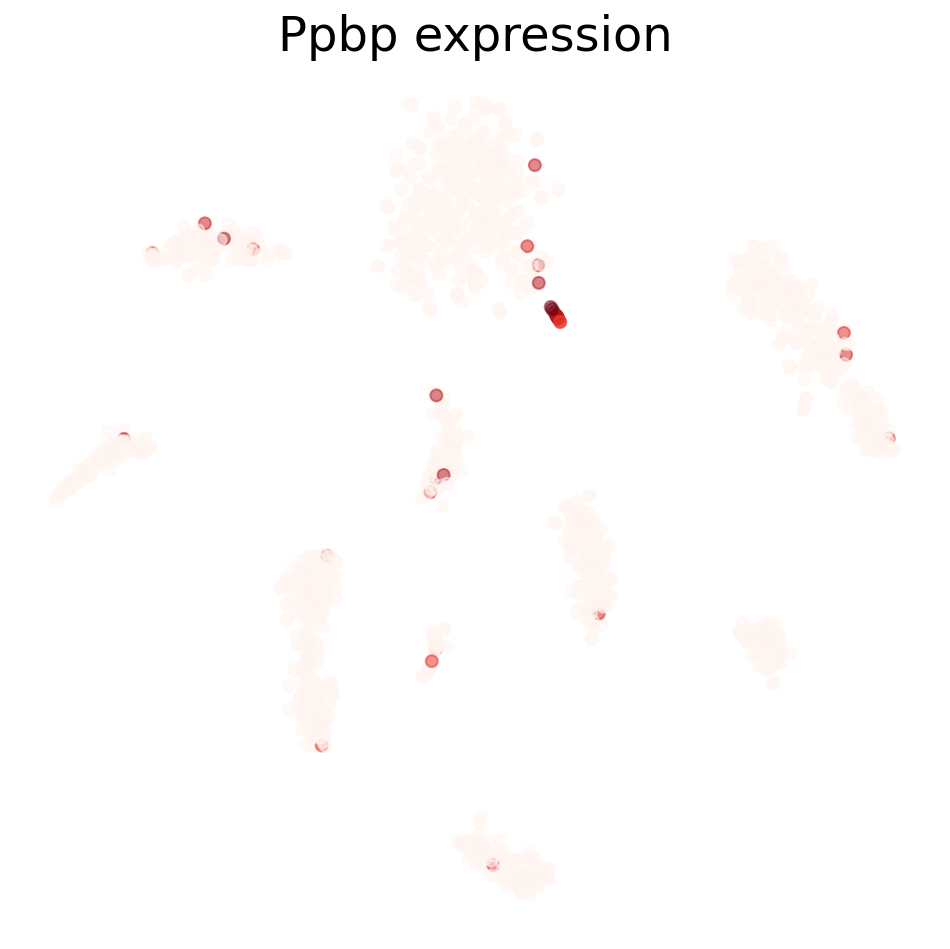

In [76]:
# visualize expression patterns of a specific marker gene
gene = "Ppbp"

fig, ax = plt.subplots(figsize=(7,7))

x = data.obsm["X_nca_tsne"][:,0]
y = data.obsm["X_nca_tsne"][:,1]
c = nd(data.layers["log1p"].todense()[:,data.var.gene_name==gene])

ax.scatter(x, y, c = c, cmap='Reds', alpha=0.5)

ax.set_axis_off()
ax.set_title("{} expression".format(gene))
plt.tight_layout()
plt.show()

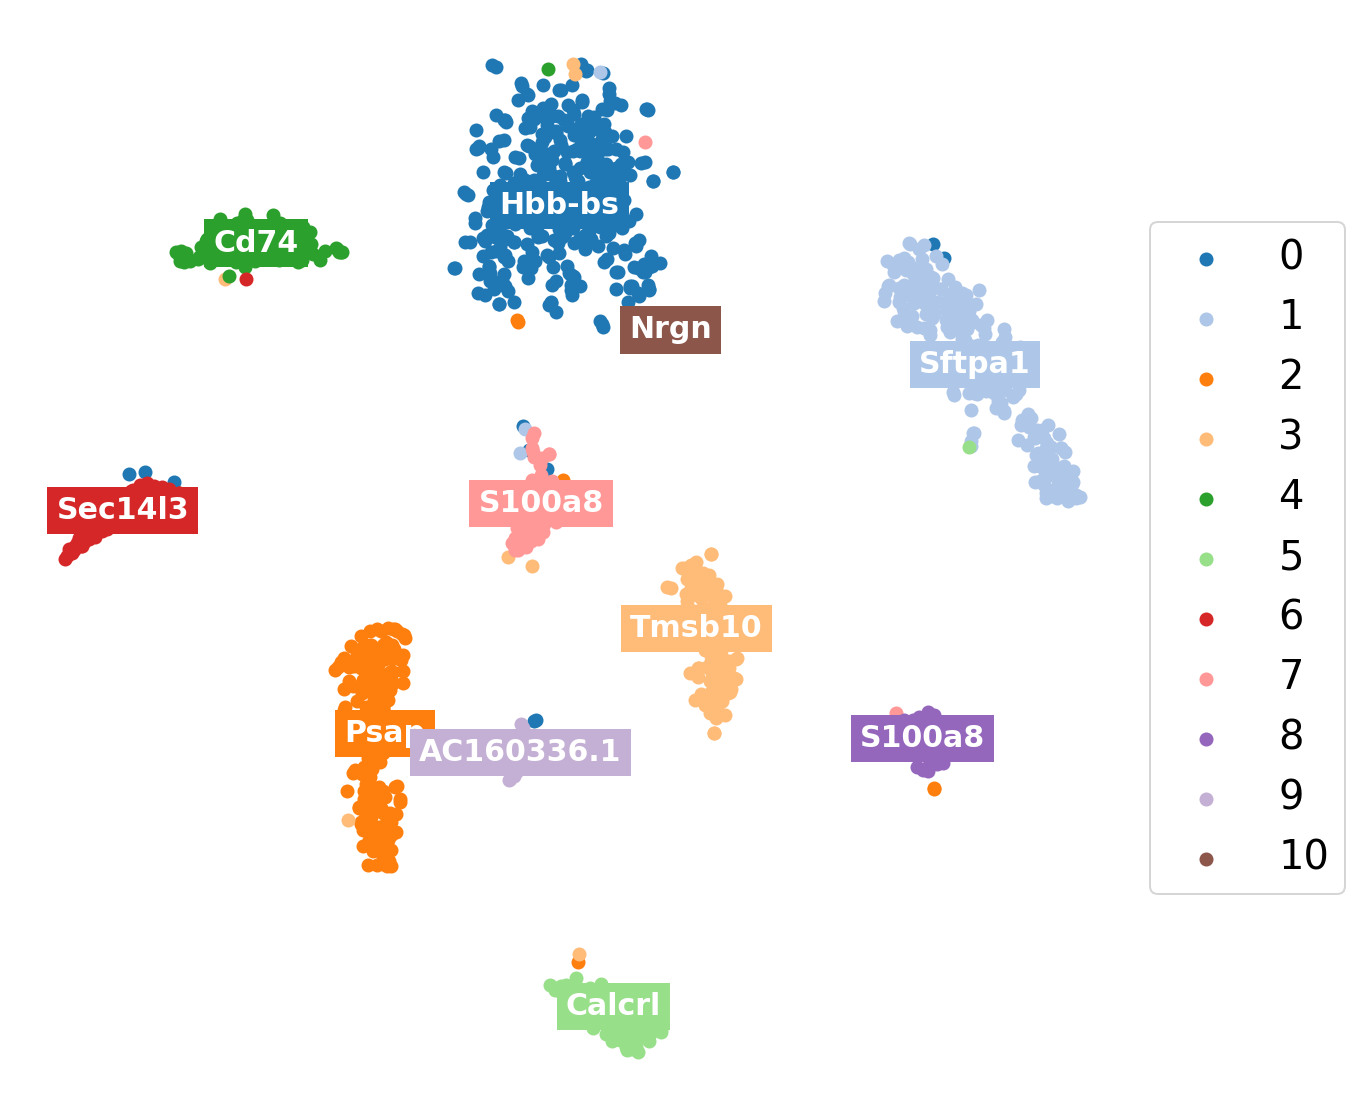

In [79]:
fig, ax = plt.subplots(figsize=(10,10))

c = np.unique(data.obs["leiden"].values.astype(int)).astype(str)
cmap = cm.get_cmap("tab20")

for idx, (cluster, gene) in enumerate(zip(c, specific_gene)):
    XX = data[data.obs.leiden == cluster,:].obsm["X_nca_tsne"]
    
    x = XX[:,0]
    y = XX[:,1]
    ax.scatter(x, y, color = cmap(idx), label=cluster)
    ax.annotate(gene, 
             (np.mean(x), np.mean(y)),
             horizontalalignment='center',
             verticalalignment='center',
             size=15, weight='bold',
             color="white",
               backgroundcolor=cmap(idx)) 
    

ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_axis_off()
plt.show()

In [80]:
top_idx = [np.where(i == data.var.gene_name.values)[0][0] for i in specific_gene]

In [81]:
mat = data.layers["norm"].todense()
obs = data.obs
var = data.var

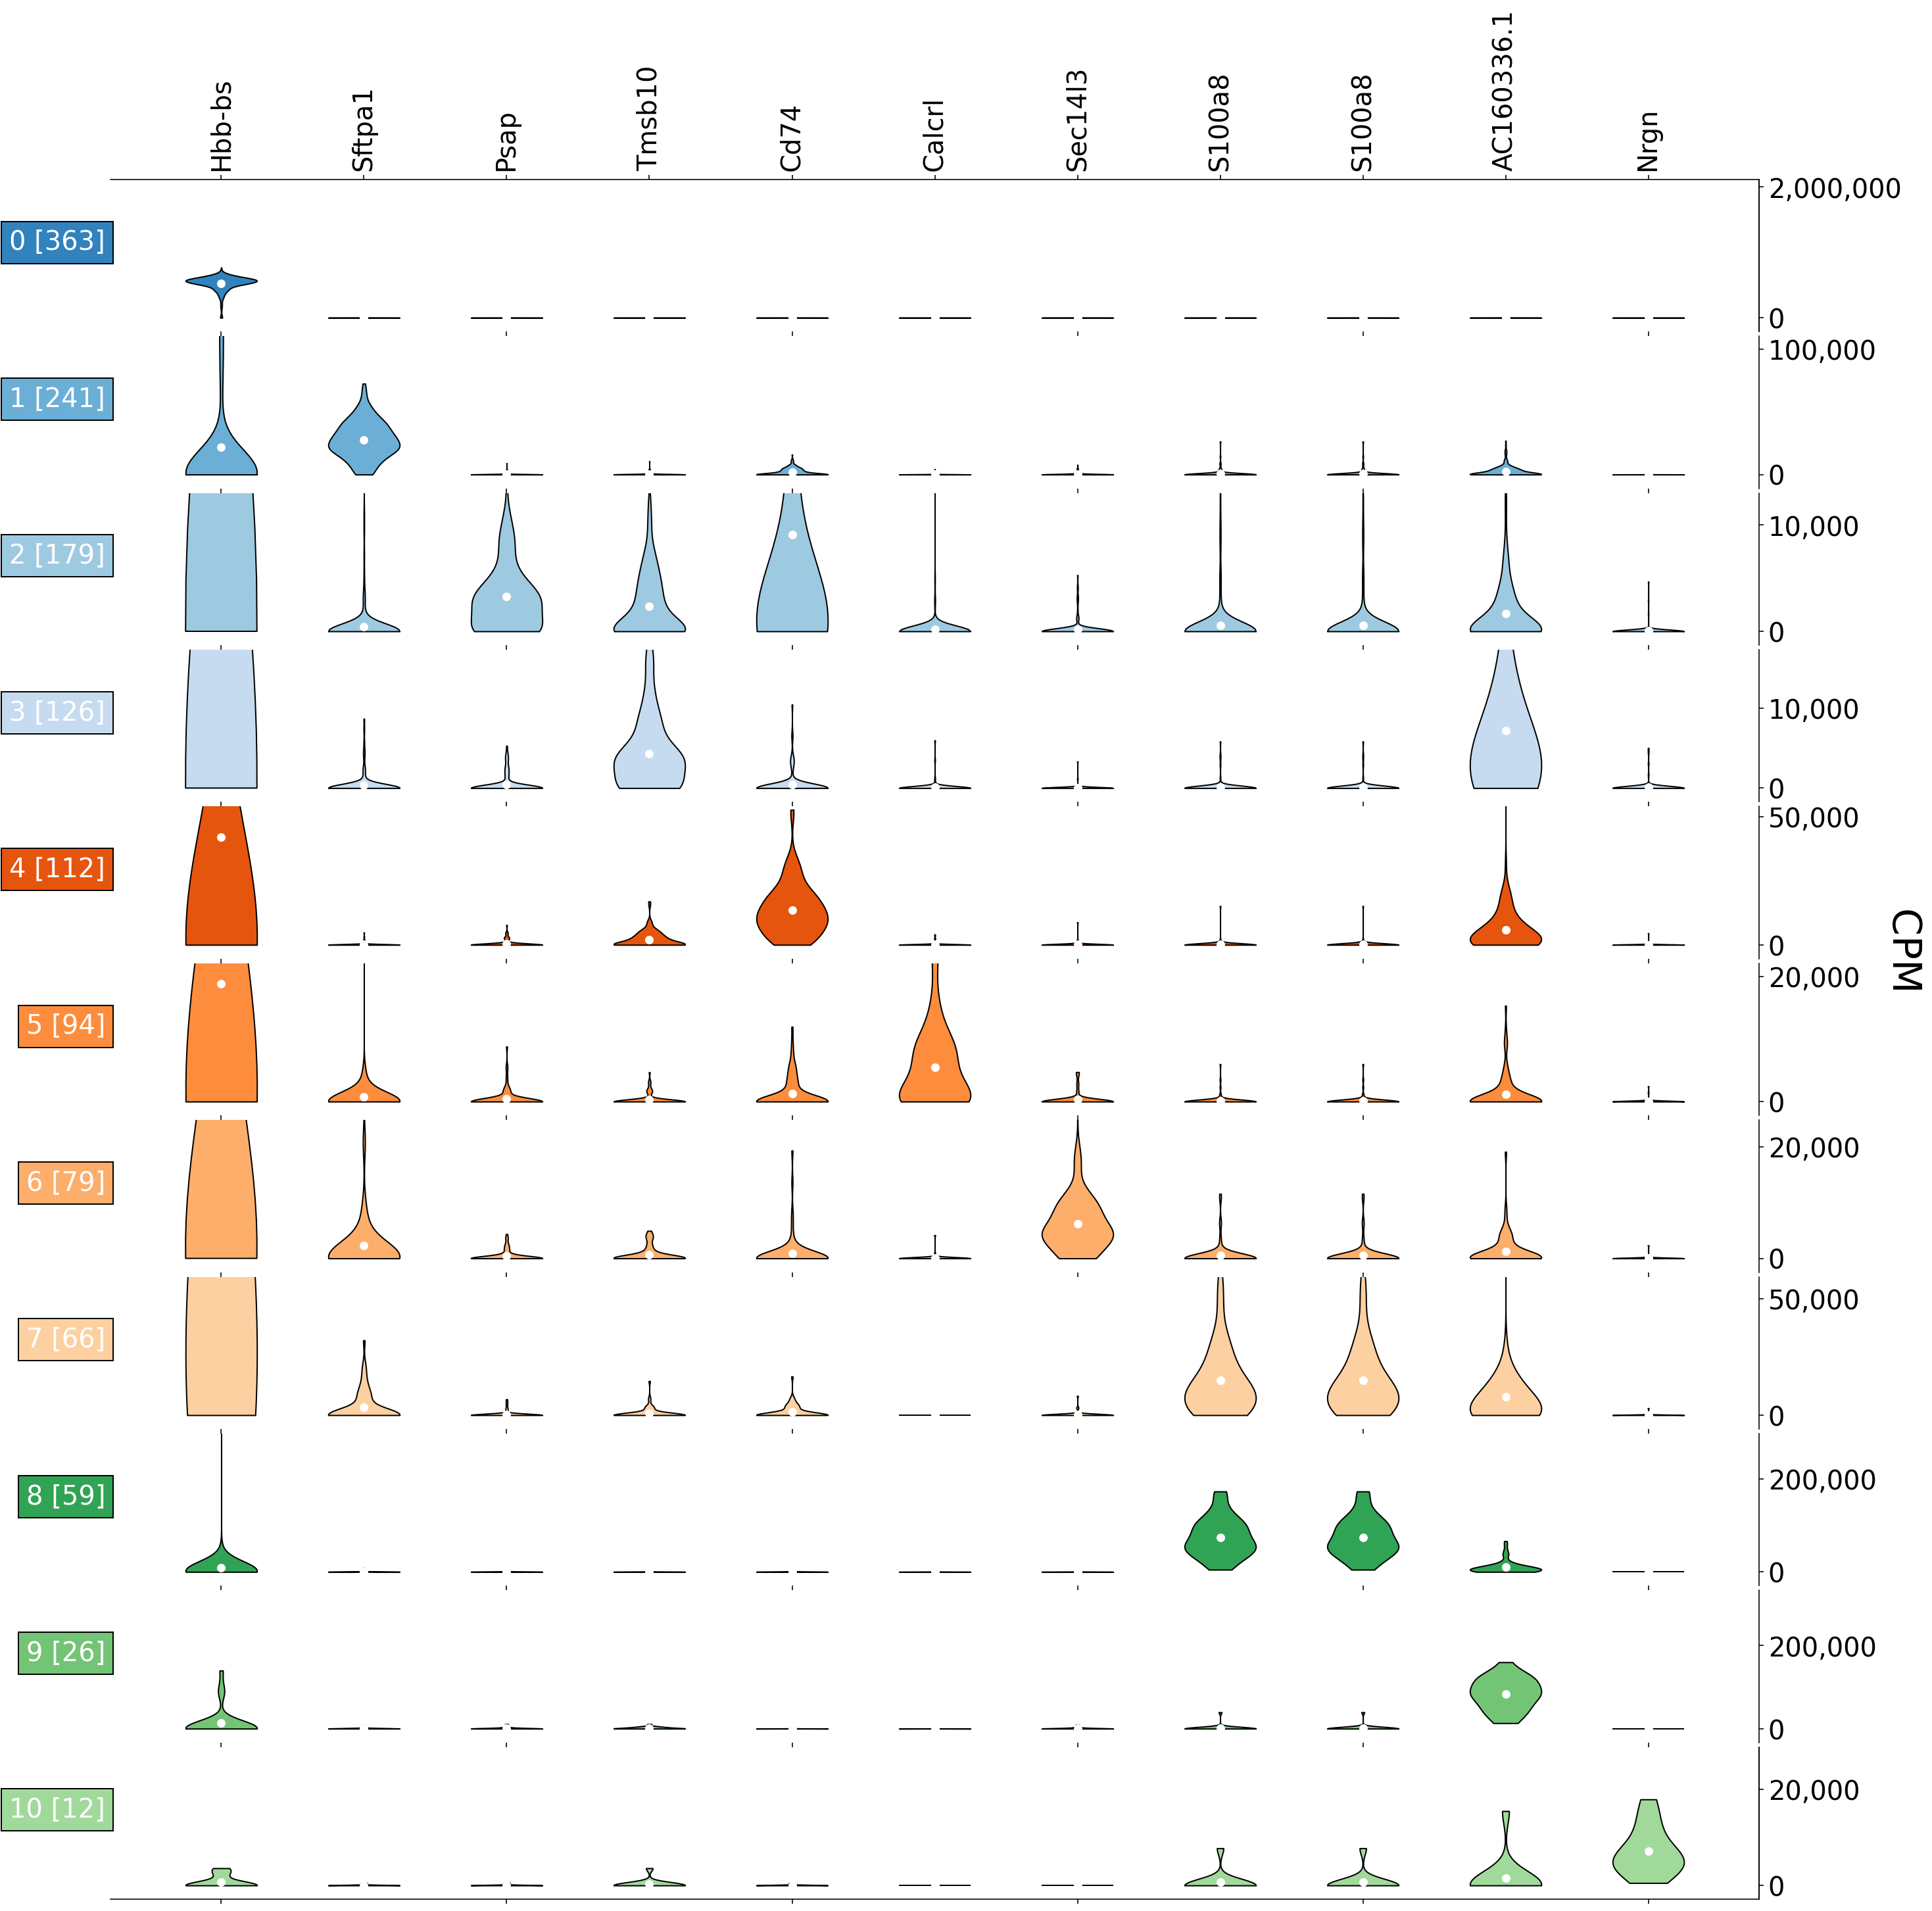

In [82]:
fig, axs = plt.subplots(figsize=(20,20), nrows=len(unique))
fig.subplots_adjust(wspace=0, hspace=0)


labels = specific_gene
lidx = np.arange(0, len(top_idx), 1)
means = []

for cidx, (c, ax) in enumerate(zip(unique, axs)):
    tmp_mat = mat[obs.leiden==str(c),:]
    
    x = tmp_mat[:,top_idx]
    means.append(nd(np.median(x,axis=0)))

    v = ax.violinplot(x.T.tolist(), showmedians=False, showextrema=False, positions=lidx)

    for pcidx, pc in enumerate(v['bodies']):
        pc.set_edgecolor('black')
        pc.set_alpha(1)
        pc.set_facecolor(cm.tab20c(cidx))
        

    means = [np.mean(i) for i in x.T]
    ax.scatter(lidx, means, marker='o', color='white', s=30, zorder=3)
 
    if cidx==0:
        ax_top = ax.twiny()
        ax_top.set_xlim(ax.get_xlim())
        ax_top.set_xticks(lidx)
        ax_top.set_xticklabels(labels, rotation=90, ha="center")
        ax_top.spines["top"].set_visible(True)
        ax_top.spines["left"].set_visible(False)
        ax_top.spines["bottom"].set_visible(False)
    if cidx == len(unique)-1:
        ax_bot = ax.twiny()
        ax_bot.set_xticks([])
        ax_bot.set_xticklabels([])
        ax_bot.spines["top"].set_visible(False)
        ax_bot.spines["left"].set_visible(False)
        ax_bot.spines["bottom"].set_visible(True)

    ax.set_xticklabels("")
    ax.yaxis.tick_right()
    ax.set_ylabel("{} [{:,}]".format(c, x.shape[0]), color="white",rotation="horizontal", ha="right",bbox=dict(boxstyle="square",ec="black",fc=cm.tab20c(cidx)))
    

    
    lim = nd(x.mean(axis=0))[cidx]*4
    
    ax.set_ylim(-lim*0.1, lim)
    
    ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
    
    ax.spines["top"].set_visible(False)
    ax.spines["left"].set_visible(False)
    ax.spines["bottom"].set_visible(False)

        
    
    

plt.tight_layout(pad=0, w_pad=0, h_pad=0)
fig.text(1, 0.5, 'CPM ', ha='center', va='center', rotation=270, fontsize=30)
plt.show()

In [86]:
markers = ["Ear2","Cd79b","Ednrb","Ccl17","Itgae",
           "Cd209a","Itgam","Itgax","Trbc2","Cd8b1","Foxj1",
           "Ly6c2","Plac8","Scgb1a1","Cxcr2","Prg4",
           "Bpifb1","Dcn","Col1a2","C1qb","Inmt","Mmrn1",
           "Ppbp","Msln","Gzma","Ngp","Mzb1","Acta2",
           "Sftpd","Rtkn2","Tmem100","Vwf"]
features = data.var.gene_name.values


In [87]:
midx = [np.where(i==features)[0][0] for i in markers]

IndexError: ignored

In [88]:
assignments = data.obs.leiden.values

In [89]:
# for each cluster for each gene get two things
# 1 percent of cells in the cluster expressing that gene
# 2 average expression of that gene (for cells that are expressing it)


per = np.zeros((len(unique), len(markers)))
avg = np.zeros((len(unique), len(markers)))

mtx = data.layers["log1p"]#.todense()


for cn, c in enumerate(unique):
    tmp_mtx = mtx[assignments==c]
    sub_mtx = tmp_mtx[:,midx]
    
    avg[cn] = nd(sub_mtx.mean(axis=0))
    per[cn] = (sub_mtx>0).sum(axis=0)/sub_mtx.shape[0]

NameError: ignored

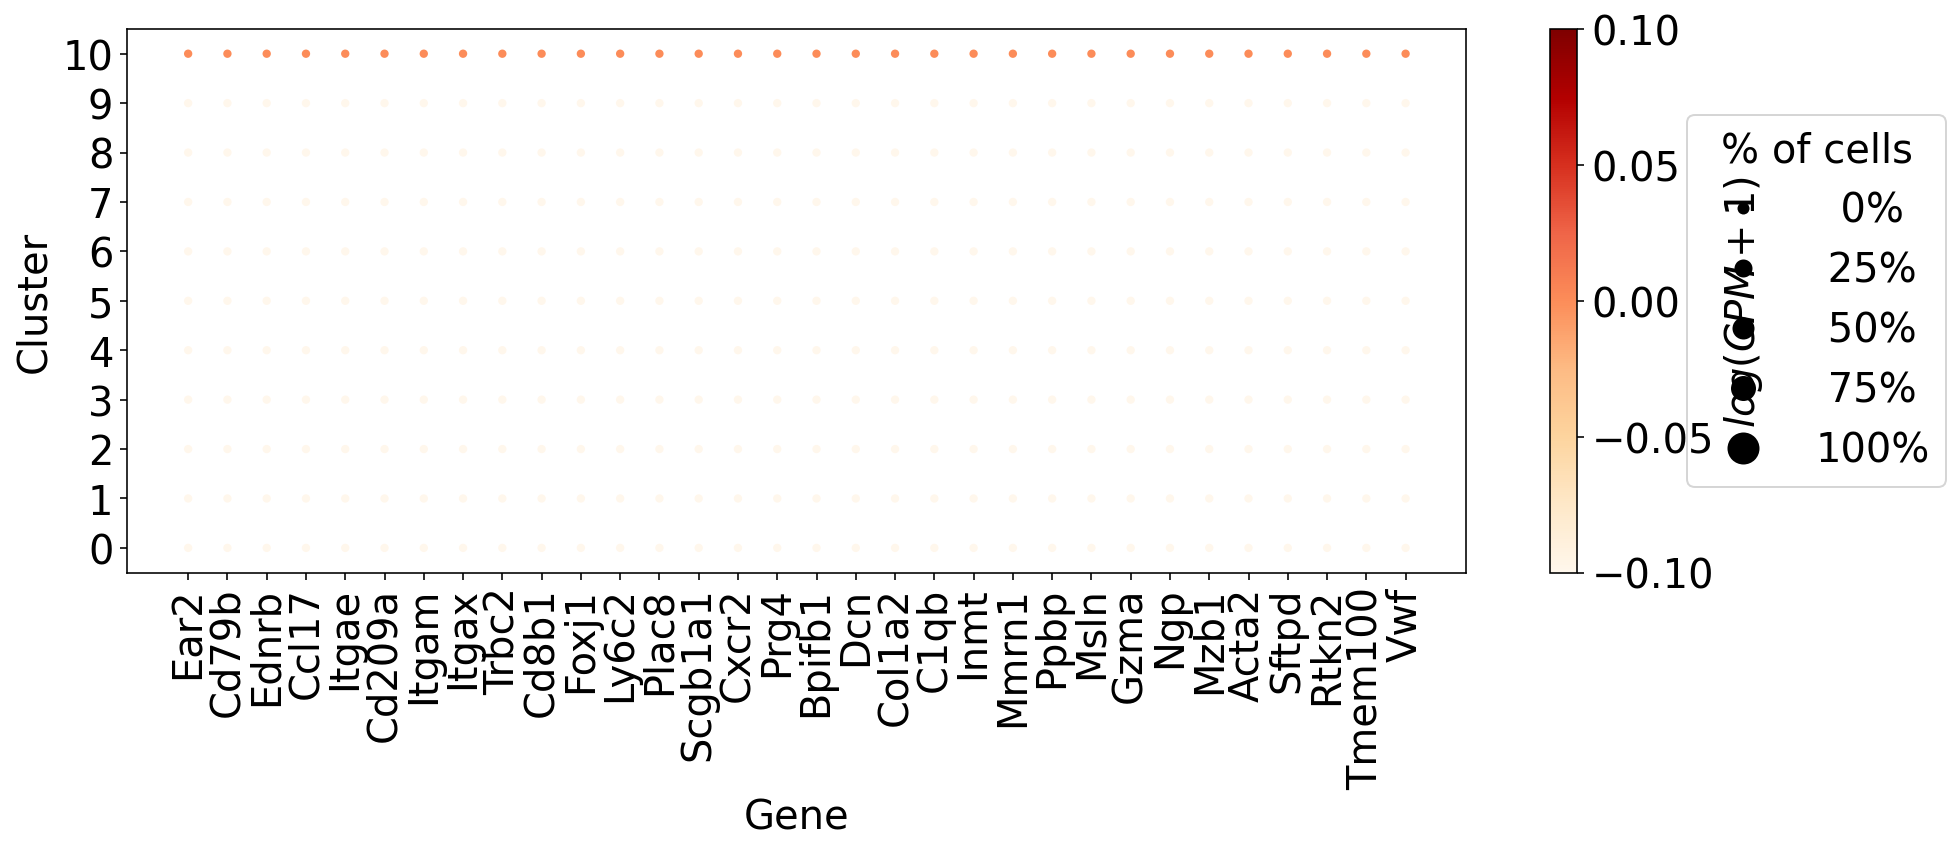

In [90]:
fig, ax = plt.subplots(figsize=(15,5))
xidx = np.arange(len(markers))
yidx = np.arange(len(unique))

xlabels = markers
ylabels = unique

X, Y = np.meshgrid(xidx, yidx)


for dn, d in enumerate(per):
    a = ax.scatter(X[dn],Y[dn], s=d*500+10, c = avg[dn], cmap="OrRd")

ax.set_xticks(xidx)
ax.set_yticks(yidx)

ax.set_xticklabels(xlabels, rotation=90, ha="center")
ax.set_yticklabels(ylabels)

ax.set_xlabel("Gene")
ax.set_ylabel("Cluster")

ax.figure.colorbar(a, ax=ax, label="$log(CPM+1)$")

handles =  [Line2D([0], [0], marker='o', color='w', label='  0%',markerfacecolor='black', markersize=7),
            Line2D([0], [0], marker='o', color='w', label=' 25%',markerfacecolor='black', markersize=10),
            Line2D([0], [0], marker='o', color='w', label=' 50%',markerfacecolor='black', markersize=12),
            Line2D([0], [0], marker='o', color='w', label=' 75%',markerfacecolor='black', markersize=13.5),
            Line2D([0], [0], marker='o', color='w', label='100%',markerfacecolor='black', markersize=17)]
ax.legend(handles=handles, loc="center left", bbox_to_anchor=(1.15,0.5), title="% of cells")

plt.show()